# Alucidación de péptidos antimicrobianos por medio de Machine Learning

La bioinformática utiliza el aprendizaje automático para resolver problemas biológicos, incluyendo la identificación de péptidos antimicrobianos, esenciales en el desarrollo de terapias contra patógenos resistentes. La representación adecuada de secuencias peptídicas es crucial, lográndose mediante descriptores fisicoquímicos y métodos de codificación. 

   - Los **descriptores fisicoquímicos** cuantifican propiedades como hidrofobicidad y carga eléctrica, transformando las secuencias en formatos cuantitativos que facilitan la distinción de los péptidos antimicrobianos. 

   - Las **codificaciones** transforman las secuencias en vectores numéricos, utilizando métodos como "one-hot" o matrices de sustitución como BLOSUM, que reflejan la probabilidad de sustitución de aminoácidos a lo largo de la evolución. Estas técnicas permiten a los modelos de aprendizaje automático interpretar y diferenciar efectivamente entre tipos de péptidos.

   **ProPythia** es una plataforma para la clasificación de secuencias biológicas (proteínas y ADN) utilizando aprendizaje automático y profundo. Se trata de una plataforma genérica, modular y semi-automatizada en Python que contiene funciones para la representación de secuencias y un pipeline de aprendizaje automático/aprendizaje profundo. La principal fortaleza y uso de este paquete es la DESCRIPCIÓN de SECUECIAS BIOLÓGICAS, un paso crucial en cualquier pipeline de aprendizaje automático. Incluye: - cálculo de descriptores fisicoquímicos de proteínas (paralelización disponible) - cálculo de diferentes codificaciones de proteínas - cálculo de descriptores fisicoquímicos de ADN - cálculo de diferentes codificaciones de ADN - Entrenamiento y uso de técnicas de incrustación de palabras (https://github.com/BioSystemsUM/propythia).

- Sequeira, A. M., Lousa, D., & Rocha, M. (2022). ProPythia: a Python package for protein classification based on
  machine and deep learning. Neurocomputing, 484, 172-182.

In [1]:
import sys
import os
# Obtener la ruta del directorio del script actual
current_script_directory = os.path.dirname(os.path.abspath('.'))

# Construir la ruta al directorio src
src_directory = os.path.join(current_script_directory, "..", "src")
srcpro_directory = os.path.join(current_script_directory, "..", "src/propythia")

# Agregar el directorio src a sys.path
sys.path.append(src_directory)
sys.path.append(srcpro_directory)

In [2]:
#Cargar librerías necesarias 

import pandas as pd
import numpy as np
from Bio import SeqIO
import transformers
import torch


from propythia.protein.sequence import ReadSequence
from propythia.protein.descriptors import ProteinDescritors
from propythia.protein.encoding import Encoding

### Preprocesamiento de la base de datos

Partimos de una base de datos que se creó anteriormente, resultado de la suma y unificación de diferentes bases de datos de péptidos antimicrobianos. De cada base de datos se tomó unicamente las secuancias peptídicas, su identificador asociado para cada base de datos y la actividad descrita. Posteriormente, mediante diferentes querys y joins con otras bases random forest workflow
 datos, se fue añadiendo información extra, como el ID para cada secuencia en PubMed, Uniprot o APD3, además de el Target específico si se conocía. Así mismo, atendiendo a su actividad descrita, se catalogaron en AMP y noAMP.

A continuación se hará una limpieza de la base de datos para poder trabajar con ella con Propythia.

In [3]:
# Cargar el DataFrame desde el archivo CSV. Este dataframe ha sido previamente procesado para Machine Learning, 
# de forma que cuando una secuencia aparece como AMP, se elimina su función nAMP o desconocido.

data = pd.read_csv('../../db/ALL/files_results/db_AMP_ML.csv')

# Renombrar la columna a 'sequence' si es necesario
data.rename(columns={'Sequence': 'sequence'}, inplace=True)

El módulo ReadSequence de Propythia contiene funciones diseñadas para preprocesar las secuencias de proteínas, reemplazando o eliminando ciertos aminoácidos. La fase de preprocesamiento puede ser necesaria para calcular ciertas características o codificaciones de descriptores.

In [4]:
read_seqs = ReadSequence()
res = read_seqs.par_preprocessing(dataset= data, col = 'sequence', B ='N', Z = 'Q', U = 'C', O = 'K', J = 'I', X = '')

El módulo ProteinDescriptors es responsable de realizar el cálculo de varios descriptores basados en secuencias. 

In [5]:
descriptors_df = ProteinDescritors(dataset= data ,  col= 'sequence')

 # Descriptores fisicoquímicos



 En el campo del machine learning aplicado a péptidos antimicrobianos, varias características fisicoquímicas son críticas para desarrollar modelos predictivos efectivos. Aquí están algunas de las más importantes:

- **Longitud del péptido:** Afecta directamente a propiedades como la solubilidad, la estabilidad estructural y la capacidad de interactuar con las membranas y objetivos biológicos.

- **Carga neta y densidad de carga:** Indican cómo el péptido interactúa con membranas cargadas negativamente. La densidad de carga toma en cuenta tanto la carga total como el tamaño del péptido.

- **Hidrofobicidad y ratio de hidrofobicidad:** Determinan la interacción del péptido con membranas lipídicas y su solubilidad. El ratio de hidrofobicidad compara regiones hidrofóbicas con hidrofílicas dentro de la molécula.

- **Composición de aminoácidos:** Influye en muchas propiedades, incluida la estructura y la carga del péptido.

- **Estructura secundaria:** Afecta la forma en que el péptido interactúa con las membranas y su resistencia a enzimas degradantes.

- **Peso molecular:** Relacionado con la estabilidad y biodisponibilidad del péptido.

- **Aromaticidad:** Presencia de residuos aromáticos que pueden influir en la estructura y función del péptido.

- **Punto isoeléctrico:** El pH en el cual el péptido tiene carga neta cero, importante para predecir la solubilidad y la interacción con el entorno.

- **Flexibilidad:** Indica cómo el péptido puede adaptarse o insertarse en membranas o interactuar con otras moléculas.

- **Índice alifático:** Una medida de la voluminosidad de los residuos alifáticos en un péptido, que afecta a la estabilidad estructural.

- **Índice de Boman:** Predice la potencialidad de un péptido para unirse a proteínas, lo cual es importante en la definición de su función biológica.

- **Gravy (Grand Average of Hydropathy):** Un promedio del carácter hidropático de los residuos, indicando la tendencia general del péptido hacia ser hidrofóbico o hidrofílico.

- **Fórmula y enlaces químicos:** La composición química exacta y los enlaces dentro de los aminoácidos pueden proporcionar información detallada sobre las propiedades del péptido.

- **Coeficiente de extinción molar:** Esencial para determinar la concentración de péptidos en solución mediante técnicas espectroscópicas como la absorción UV. Este coeficiente depende de la cantidad y tipos de residuos de aminoácidos que absorben luz (como los triptófanos y tirosinas), y es crucial para estudios cuantitativos.

Todos estos predictores fisicoquímicos calculados proporcionan una base robusta para el desarrollo de modelos de machine learning que predicen la actividad de nuevos péptidos antimicrobianos basados en sus características fisicoquímicas.

Se calcularon descriptores mediante funciones de Propythia y otras manualmente.

In [6]:
## Cálculo de la frecuencia de aminoácidos dentro de la secuencia (PROPYTHIA)

df_aa_comp = descriptors_df.get_aa_comp(n_jobs=4)

Los aminoácidos fueron categorizados atendiendo a su naturaleza (Nelson, D. L., & Cox, M. M. (2017). Lehninger principles of biochemistry (7th ed.). W.H. Freeman), para calcular la proporción de aminoácidos hidrofóbicos, hidrogílicos, básicos, ácidos y alifáticos dentro de la secuencia.

In [7]:
# Calculo de frecuencias de aminoácidos según su naturaleza (MANUAL)

# Categorías de aminoácidos (Nelson, D. L., & Cox, M. M. (2017). Lehninger principles of biochemistry (7th ed.). 
# W.H. Freeman.) 

hidrofobicos = {'A', 'I', 'L', 'M', 'F', 'V', 'P', 'G'}
hidrofilicos = {'R', 'N', 'D', 'C', 'E', 'Q', 'H', 'K', 'S', 'T', 'Y', 'W'}
basicos = {'R', 'H', 'K'}
acidos = {'D', 'E'}
alifaticos = {'A', 'V', 'I', 'L'}

masas_aminoacidos = {
    'A': 89.09, 'R': 174.20, 'N': 132.12, 'D': 133.10, 'C': 121.15,
    'E': 147.13, 'Q': 146.15, 'G': 75.07, 'H': 155.16, 'I': 131.17,
    'L': 131.17, 'K': 146.19, 'M': 149.21, 'F': 165.19, 'P': 115.13,
    'S': 105.09, 'T': 119.12, 'W': 204.23, 'Y': 181.19, 'V': 117.15
}

def propiedades(secuencia):
    
    longitud = len(secuencia)
    conteos = {aa: secuencia.count(aa) for aa in set(secuencia)}
    faltantes = set(masas_aminoacidos.keys()) - set(secuencia)
    mas_frecuente = max(conteos, key=conteos.get, default=None)
    frecuencia_hidrofobicos = round(sum(conteos.get(aa, 0) for aa in hidrofobicos) / longitud, 2)
    frecuencia_hidrofilicos = round(sum(conteos.get(aa, 0) for aa in hidrofilicos) / longitud, 2)
    frecuencia_basicos = round(sum(conteos.get(aa, 0) for aa in basicos) / longitud, 2)
    frecuencia_acidos = round(sum(conteos.get(aa, 0) for aa in acidos) / longitud, 2)

    return pd.Series({
        'sequence': secuencia,
        'aa_missing': faltantes,
        'aa_more_freq': mas_frecuente,
        'hydrophobic_freq': frecuencia_hidrofobicos,
        'hydrophilic_freq': frecuencia_hidrofilicos,
        'basic_freq': frecuencia_basicos,
        'acid_freq': frecuencia_acidos,
    })

df_statistics = df_aa_comp['sequence'].apply(propiedades)

In [8]:
# Concatenamos los dos dataframes
df_aa_stat = pd.merge(df_aa_comp, df_statistics, on='sequence')

In [9]:
# Cálculo de diferentes propiedades fisicoquímicas haciendo uso de librerias de Biopyhton (PROPYTHIA)
df_physicochemical = descriptors_df.get_all_physicochemical(ph=7, amide=False, n_jobs=4)

In [10]:
# Concatenar ambos cálculos
df_fq_prop = pd.merge(df_physicochemical, df_aa_stat, on='sequence')

# Guardar el DataFrame en un archivo CSV
df_fq_prop.to_csv('archivos/db_FQ.csv', index=False)

## Estadística

Se analizaron los predictores fisicoquímicos para identificar correlaciones entre ellos y determinar si podían clasificar adecuadamente las secuencias AMP y noAMP según estos predictores. Además, se evaluó la importancia de cada predictor en los Análisis de Componentes Principales (PCA). También se realizó un mapeo UMAP para visualizar la distribución de las secuencias en un espacio de menor dimensión, facilitando la identificación de patrones y agrupaciones significativas. Estos análisis permitieron obtener una visión más clara de las relaciones entre los predictores y su capacidad para distinguir entre las diferentes clases de secuencias.

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Eliminar filas donde 'AMP' sea NaN
df = df_fq_prop.dropna(subset=['AMP'])

# Transforma la columna 'AMP' a valores numéricos
le = LabelEncoder()
df['AMP'] = le.fit_transform(df['AMP'])
df_AMP = df[df['AMP'] == 1]
df_nAMP = df[df['AMP'] == 0]

# Muestreo aleatorio de cada clase (PARA BALANCEAR)
sample_AMP = df_AMP.sample(n=3500, random_state=42)
sample_nAMP = df_nAMP.sample(n=3500, random_state=42)

# Combinar las muestras para obtener la muestra final balanceada
df_muestra = pd.concat([sample_AMP, sample_nAMP])

# Revolver la muestra para evitar cualquier sesgo en el orden
df_muestra = df_muestra.sample(frac=1, random_state=42).reset_index(drop=True)

# Separamos los predictores de las clases
features = [
    'length', 'charge', 'chargedensity', 'formulaC', 'formulaH', 'formulaN', 'formulaO',
    'formulaS', 'tot', 'hydrogen', 'single', 'double', 'MW_modlamp', 'Gravy', 'Aromacity',
    'IsoelectricPoint', 'Instability_index', 'SecStruct_helix', 'SecStruct_turn', 'SecStruct_sheet',
    'Molar_extinction_coefficient_reduced', 'Molar_extinction_coefficient_oxidized', 'aliphatic_index',
    'bomanindex', 'hydrophobic_ratio', 'A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K',
    'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'hydrophobic_freq', 'hydrophilic_freq', 'basic_freq', 'acid_freq'
]
X = df_muestra[features]
y = df_muestra['AMP']

C:\Users\noral\AppData\Local\Temp\ipykernel_17336\1303714225.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AMP'] = le.fit_transform(df['AMP'])


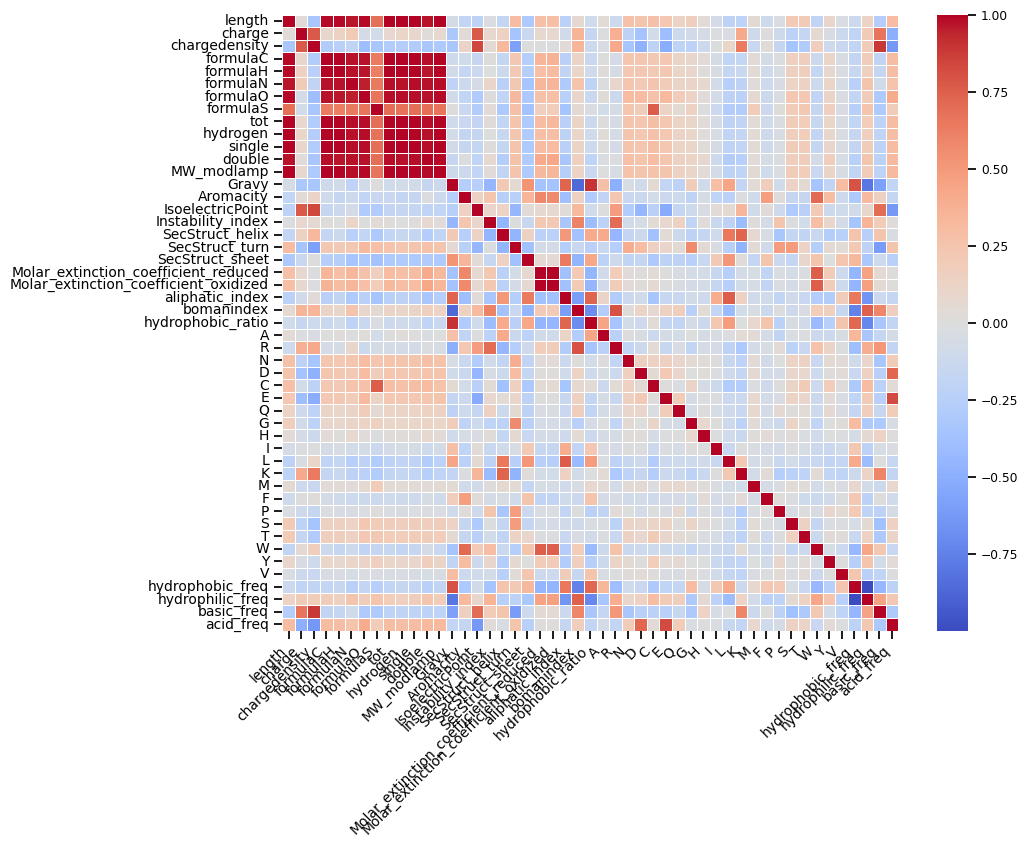

In [12]:
import seaborn as sns

correlation_matrix = X.corr()

# Configuración inicial de tamaño de fuente
sns.set_context('notebook', font_scale=0.8) 

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, fmt=".2f", cmap='coolwarm',
                 cbar=True, square=True, linewidths=.5)
plt.title('')

# Ajustar más configuraciones de fuente si es necesario
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

# Guardar la figura 
plt.savefig("figuras/correlacion_entre_FQ.png", bbox_inches='tight', dpi=300)

plt.show()

## PCA

PCA (Principal Component Analysis) es una técnica de reducción de dimensionalidad que transforma los datos a un nuevo sistema de coordenadas donde las variables están ordenadas por su varianza. Es conveniente usarlo porque simplifica los datos, reduce el ruido y ayuda a identificar las características más importantes, facilitando el análisis y la visualización.

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

# Estandarizar los datos 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)

# Instanciar y ajustar PCA
pca = PCA(n_components=4) 
df_pca = pca.fit_transform(df_scaled)

# Extraer los eigenvalores y loadings
eigenvalues = pca.explained_variance_
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Añadir varianza explicada a los ejes
explained_variance = pca.explained_variance_ratio_

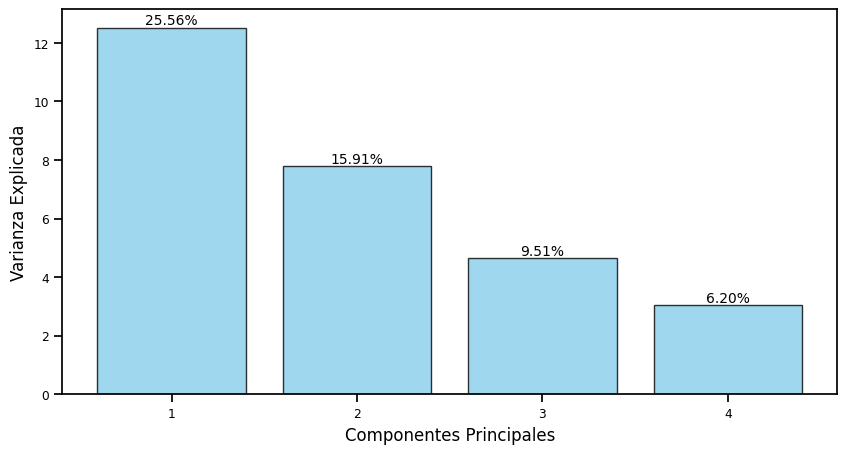

In [14]:
# Gráfico de los eigenvalores
plt.figure(figsize=(10, 5))
bars = plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.8, color='skyblue', edgecolor='black')
plt.xlabel('Componentes Principales', fontsize=12)
plt.ylabel('Varianza Explicada', fontsize=12)
plt.title('', fontsize=14)
plt.xticks(range(1, len(eigenvalues) + 1))

# Añadir etiquetas en las barras
for bar, variance in zip(bars, explained_variance):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{variance*100:.2f}%', ha='center', va='bottom', fontsize=10)


# Guardar la figura 
plt.savefig("figuras/eigenvalues_FQ.png", bbox_inches='tight', dpi=300)
plt.show()

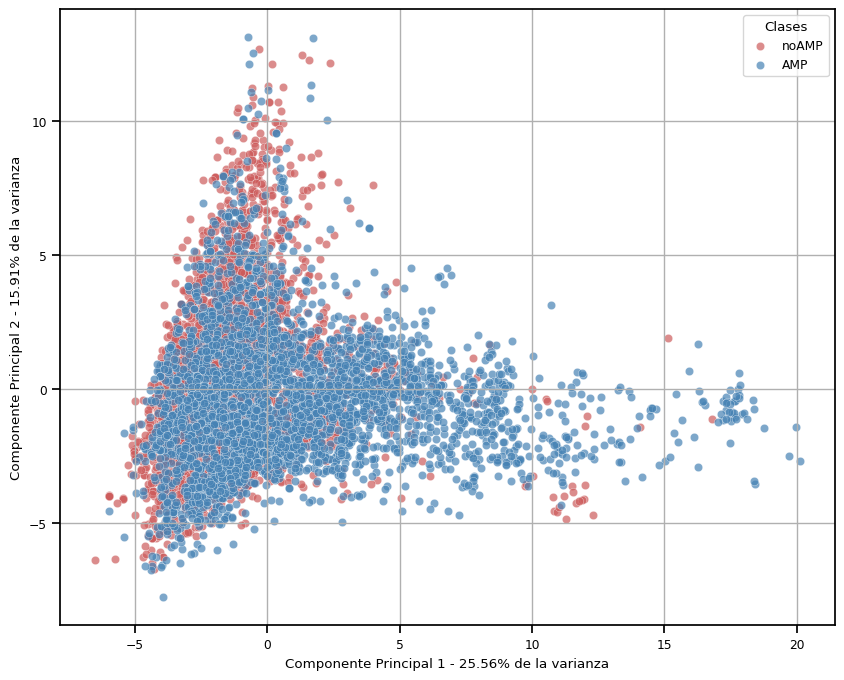

In [15]:
# Crear gráfico de dispersión de las dos primeras componentes principales
plt.figure(figsize=(10, 8))
classes = np.unique(y)
colors = plt.cm.jet(np.linspace(0, 1, len(classes))) 

# Asignar colores manualmente
class_labels = {0: 'noAMP', 1: 'AMP'}
class_colors = {0: 'indianred', 1: 'steelblue'}

for clazz in classes:
    idx = y == clazz
    plt.scatter(df_pca[idx, 0], df_pca[idx, 1], alpha=0.7, edgecolors='w', linewidths=0.3, color=class_colors[clazz], label=class_labels[clazz])

plt.title('')
plt.xlabel(f'Componente Principal 1 - {explained_variance[0]*100:.2f}% de la varianza')
plt.ylabel(f'Componente Principal 2 - {explained_variance[1]*100:.2f}% de la varianza')
plt.grid(True)
plt.legend(title='Clases')

# Guardar la figura
plt.savefig("figuras/pca_simple_FQ.png", bbox_inches='tight', dpi=300)

plt.show()

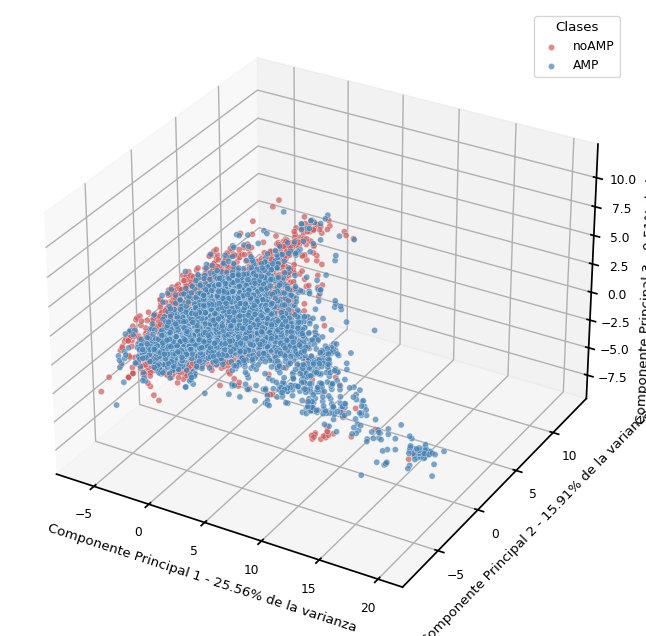

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

classes = np.unique(y)

# Asignar colores manualmente
class_labels = {0: 'noAMP', 1: 'AMP'}
class_colors = {0: 'indianred', 1: 'steelblue'}

for clazz in classes:
    idx = y == clazz
    ax.scatter(df_pca[idx, 0], df_pca[idx, 1], df_pca[idx, 2], alpha=0.7, edgecolors='w', linewidths=0.3, color=class_colors[clazz], label=class_labels[clazz])

ax.set_title('')
ax.set_xlabel(f'Componente Principal 1 - {explained_variance[0]*100:.2f}% de la varianza')
ax.set_ylabel(f'Componente Principal 2 - {explained_variance[1]*100:.2f}% de la varianza')
ax.set_zlabel(f'Componente Principal 3 - {explained_variance[2]*100:.2f}% de la varianza')
ax.grid(True)
ax.legend(title='Clases')

# Guardar la figura
plt.savefig("figuras/pca_simple_FQ_3d.png", bbox_inches='tight', dpi=300)

plt.show()

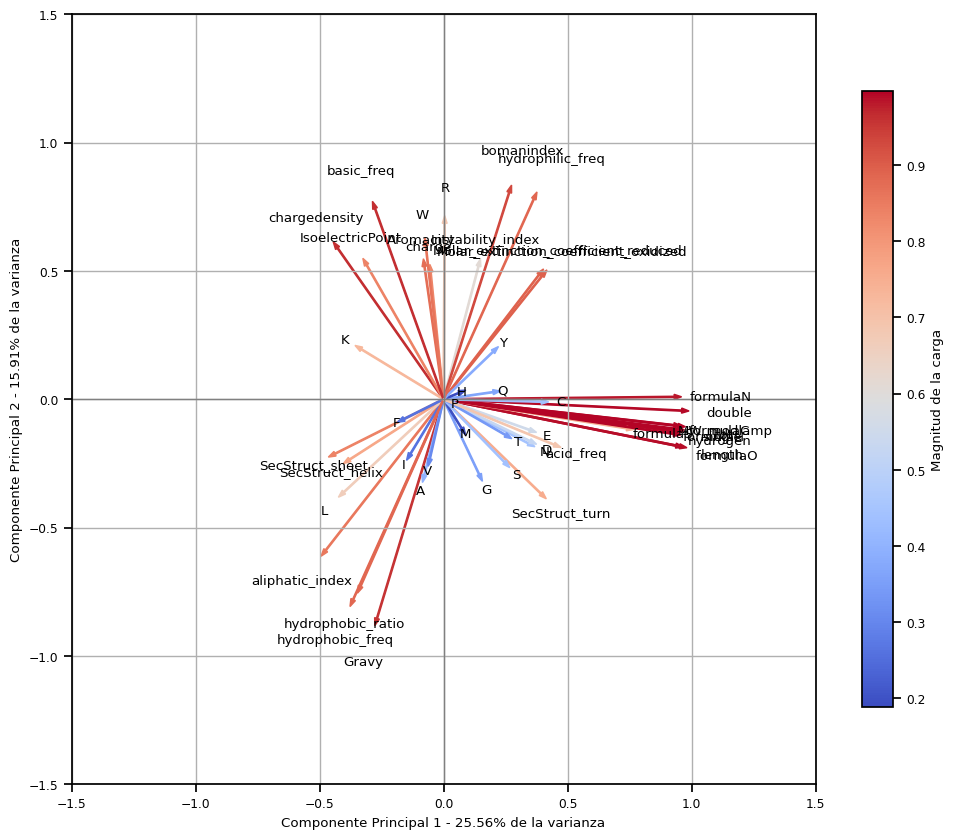

In [17]:

from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib.colors import Normalize


# Calcular la magnitud de cada vector de carga
magnitudes = np.linalg.norm(loadings, axis=1)

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(12, 10))

# Normalizar las magnitudes para el mapa de colores
norm = Normalize(vmin=np.min(magnitudes), vmax=np.max(magnitudes))

# Crear un mapa de colores de azul a rojo
cmap = plt.get_cmap('coolwarm')

# Dibujar los vectores de carga
for i in range(len(loadings)):
    color = cmap(norm(magnitudes[i]))
    ax.arrow(0, 0, loadings[i, 0], loadings[i, 1], color=color, alpha=1, width=0.005, head_width=0.02)
    plt.text(loadings[i, 0]*1.2, loadings[i, 1]*1.2, features[i], color='black', ha='center', va='center')

ax.set_title('')
plt.xlabel(f'Componente Principal 1 - {explained_variance[0]*100:.2f}% de la varianza')
plt.ylabel(f'Componente Principal 2 - {explained_variance[1]*100:.2f}% de la varianza')
ax.grid(True)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

# Configurar el ScalarMappable para la barra de colores
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Necesario para "ScalarMappable"

# Agregar barra de colores que indica la magnitud
cbar = fig.colorbar(sm, ax=ax, aspect=20, shrink=0.8)
cbar.set_label('Magnitud de la carga')


# Guardar la figura 
plt.savefig("figuras/vectores_carga_FQ.png", bbox_inches='tight', dpi=300)

plt.show()

### Clusterización

La clustalización es un proceso que agrupa datos en subconjuntos similares.  El índice de siluetas mide la calidad de los clusters, evaluando cuán cerca están los puntos dentro del mismo cluster y cuán separados están de otros clusters. K-means es un método popular para esto, que particiona los datos en k clusters basados en la proximidad a los centroides. 

Utilizar K-means junto con el índice de siluetas permite determinar el número óptimo de clusters y validar la coherencia de la agrupación.

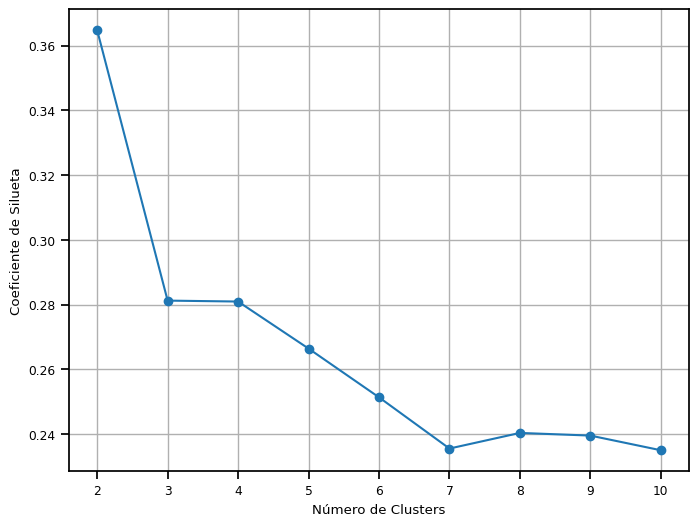

In [18]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Coeficiente de silueta
silhouette_coefficients = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(df_pca)
    score = silhouette_score(df_pca, clusters)
    silhouette_coefficients.append(score)

# Gráfico del coeficiente de silueta
plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_coefficients, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silueta')
plt.title('')
plt.grid(True)

# Guardar la figura 
plt.savefig("figuras/silhouette_FQ.png", bbox_inches='tight', dpi=300)
plt.show()

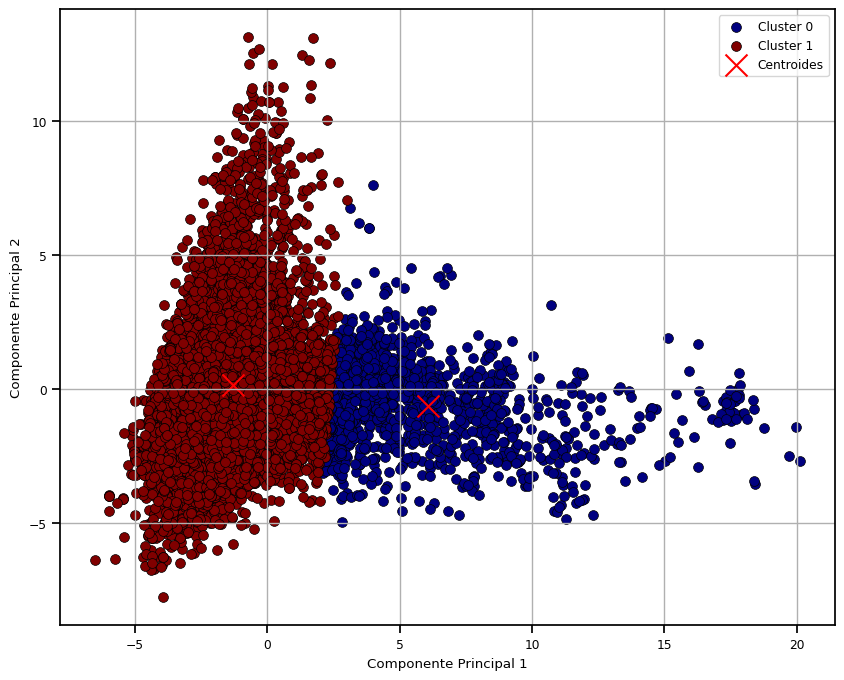

In [19]:
# Elegir el número de clusters con el mayor coeficiente de silueta
optimal_k = K[silhouette_coefficients.index(max(silhouette_coefficients))]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df_pca)  # Usar fit_predict para obtener las etiquetas de cluster directamente

# Extraer los centroides
centroids = kmeans.cluster_centers_

# Gráfico de los clusters y centroides
plt.figure(figsize=(10, 8))
colors = plt.cm.jet(np.linspace(0, 1, optimal_k))
for i in range(optimal_k):
    plt.scatter(df_pca[clusters == i, 0], df_pca[clusters == i, 1], s=50, c=[colors[i]], label=f'Cluster {i}', edgecolors='black', linewidths=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], s=250, marker='x', c='red', label='Centroides')  # Dibujar centroides
plt.title('')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)

# Guardar la figura 
plt.savefig("figuras/centroides_KMEANS_descriptores_fisicoquimicos.png", bbox_inches='tight', dpi=300)
plt.show()

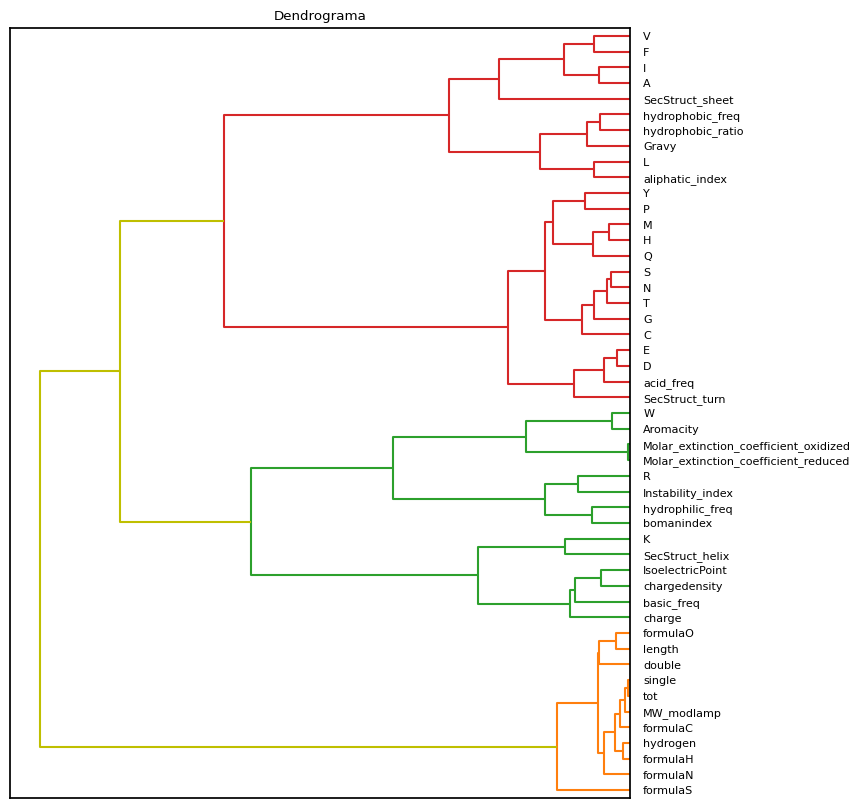

In [20]:
import seaborn as sns

# Crear un DataFrame con las cargas
df_loadings = pd.DataFrame(loadings, index=X.columns, columns=[f'PC{i+1}' for i in range(loadings.shape[1])])

# Calcular la matriz de linkage para el clustering jerárquico
link = linkage(df_loadings, method='ward')

# Crear el dendrograma en una figura separada
plt.figure(figsize=(8, 10))
ax1 = plt.gca()  # Obtener el contexto del eje actual
dendrogram(link, labels=df_loadings.index.tolist(), above_threshold_color='y', orientation='left')
ax1.set_xticks([])  # Ocultar los ticks del eje x del dendrograma
ax1.set_title('Dendrograma')

# Guardar la figura 
plt.savefig("figuras/dendrograma_descriptores_FQ.png", bbox_inches='tight', dpi=300)
plt.show()

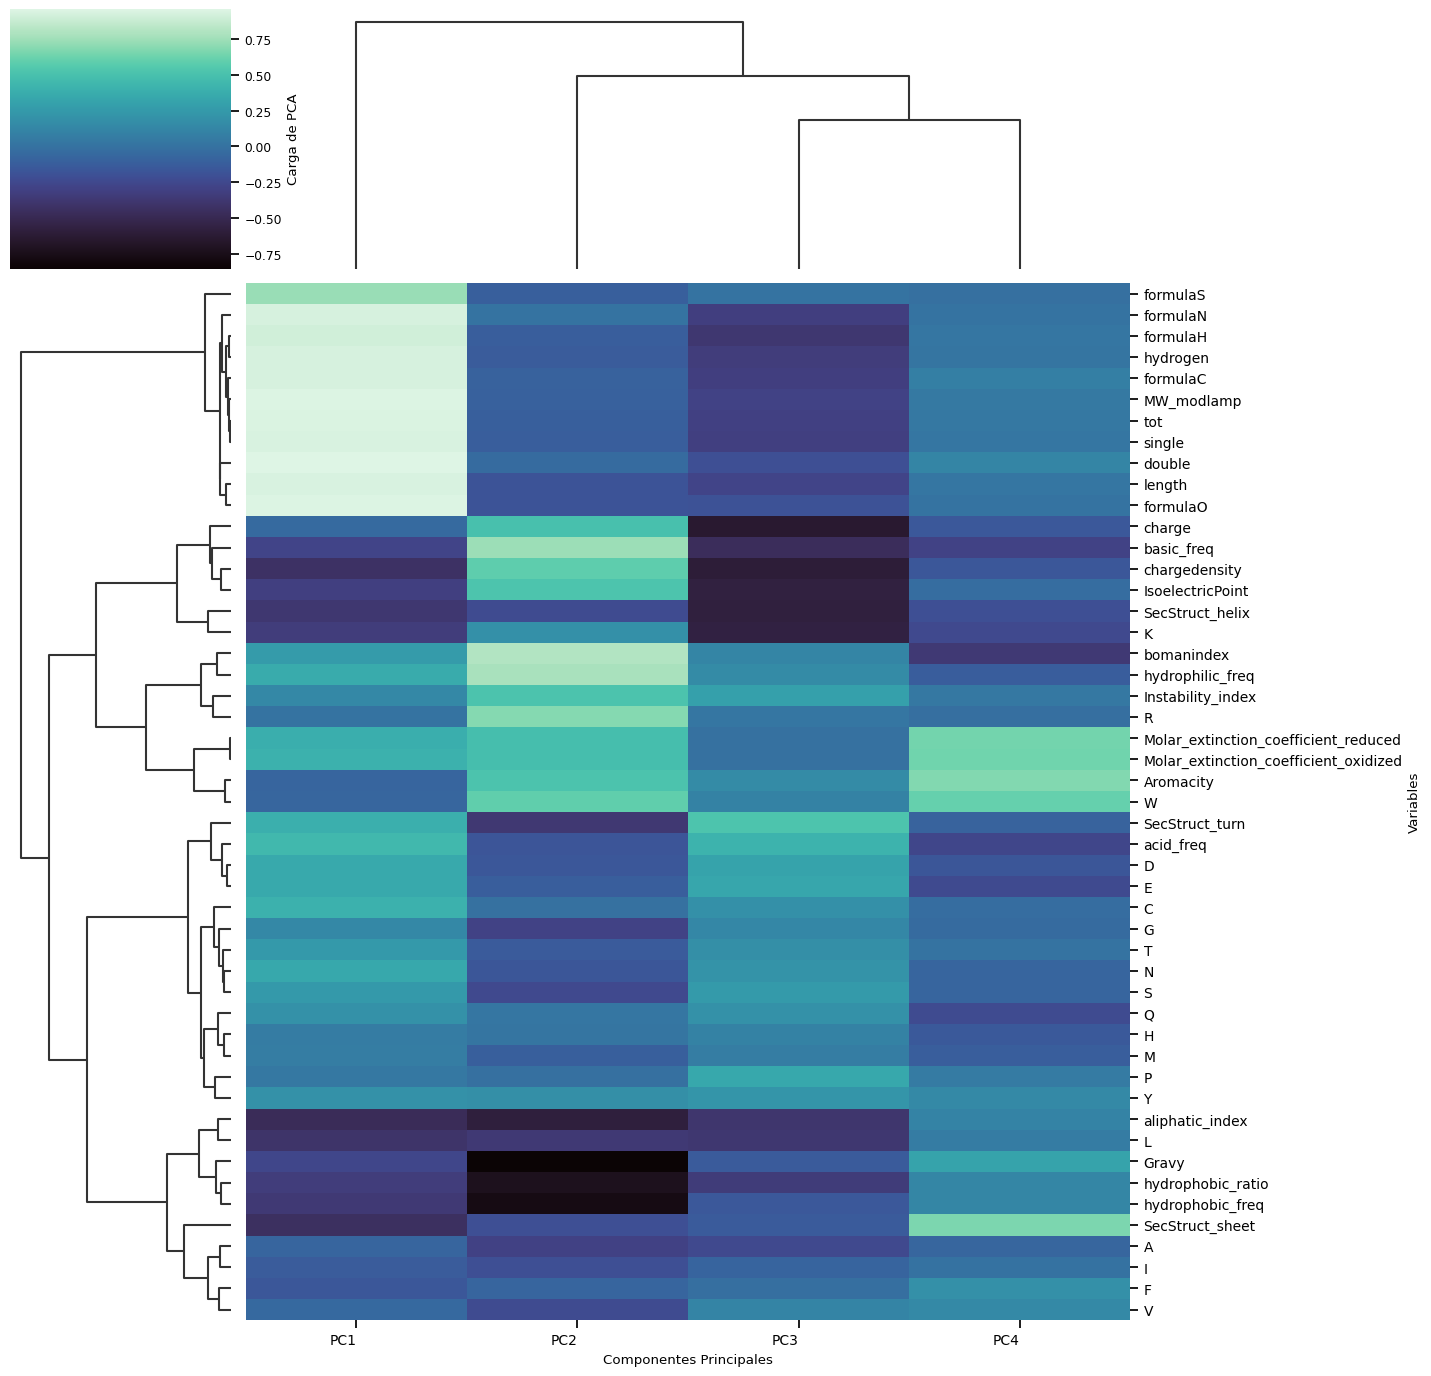

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from matplotlib.colors import LinearSegmentedColormap

# Crear un DataFrame con las cargas
df_loadings = pd.DataFrame(loadings, index=X.columns, columns=[f'PC{i+1}' for i in range(loadings.shape[1])])

# Crear el clustermap
g = sns.clustermap(df_loadings, method='ward', cmap='mako', figsize=(16, 14),  # Aumentar el tamaño de la figura
                   cbar_kws={'label': 'Carga de PCA'},
                   row_cluster=True, col_cluster=True,  # Activar el clustering para filas y columnas
                   dendrogram_ratio=(.2, .2),  # Ajustar las proporciones del dendrograma
                   tree_kws={"linewidths": 1.5},  # Ajustar el grosor de las líneas del dendrograma
                   )

# Títulos y etiquetas
plt.suptitle('', va='center', fontsize=16)
g.ax_heatmap.set_xlabel('Componentes Principales')
g.ax_heatmap.set_ylabel('Variables')

# Rotar etiquetas
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=0, ha='right', fontsize=10)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0, fontsize=10)
plt.tight_layout(rect=[0, 0, .9, 1])

# Guardar la figura 
plt.savefig("figuras/heatmap_dendrograma_cargas.png", bbox_inches='tight', dpi=300)
plt.show()

## UMAP

UMAP (Uniform Manifold Approximation and Projection) es una técnica de reducción de dimensionalidad que preserva tanto la estructura local como global de los datos. Es conveniente usarlo porque es eficiente en tiempo de ejecución, maneja grandes volúmenes de datos y proporciona visualizaciones claras y útiles en espacios de baja dimensión.

In [22]:
import umap

# Estandarizar los datos 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)


c:\Users\noral\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


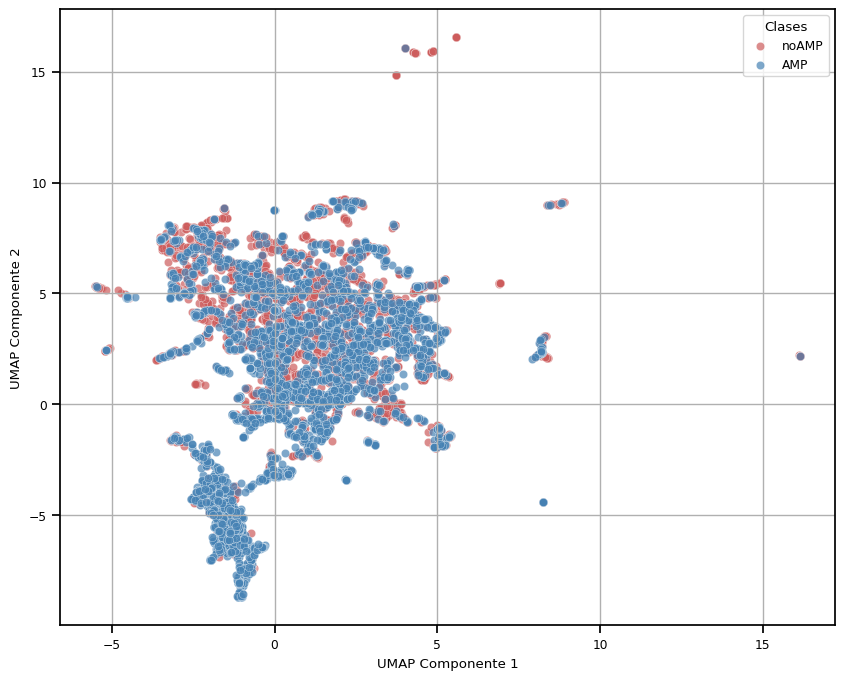

In [23]:
# Instanciar y ajustar UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
df_umap = umap_model.fit_transform(df_scaled)

# Crear gráfico de dispersión de las dos primeras componentes de UMAP
plt.figure(figsize=(10, 8))
classes = np.unique(y)
colors = plt.cm.jet(np.linspace(0, 1, len(classes)))  # Genera un colormap para distintas clases

class_labels = {0: 'noAMP', 1: 'AMP'}  
class_colors = {0: 'indianred', 1: 'steelblue'}


for clazz, color in zip(classes, colors):
    idx = y == clazz
    plt.scatter(df_umap[idx, 0], df_umap[idx, 1], alpha=0.7, edgecolors='w', linewidths=0.3, color=class_colors[clazz], label=class_labels[clazz])

plt.title('')
plt.xlabel('UMAP Componente 1')
plt.ylabel('UMAP Componente 2')
plt.grid(True)
plt.legend(title='Clases')

# Guardar la figura 
plt.savefig("figuras/umap_simple_FQ.png", bbox_inches='tight', dpi=300)
plt.show()

c:\Users\noral\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


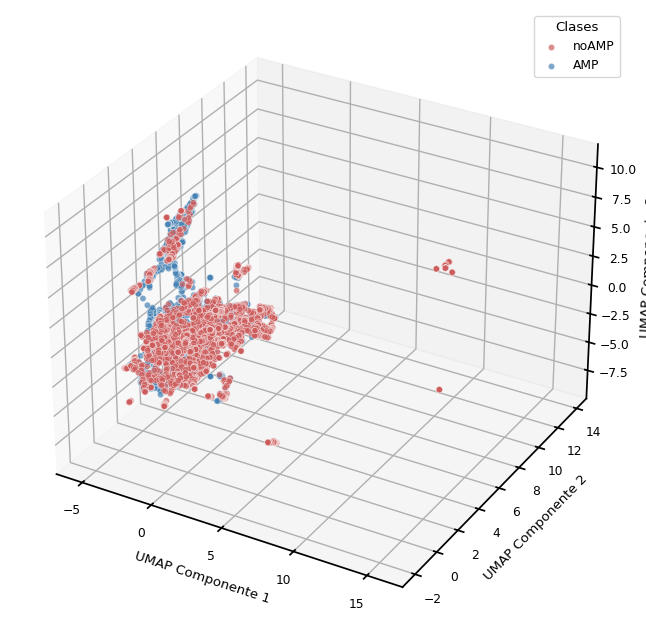

In [24]:
# Instanciar y ajustar UMAP
umap_model = umap.UMAP(n_components=3, random_state=42)
df_umap = umap_model.fit_transform(df_scaled)

# Crear gráfico de dispersión de las tres primeras componentes de UMAP
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

classes = np.unique(y)

# Asignar colores manualmente
class_labels = {0: 'noAMP', 1: 'AMP'}
class_colors = {0: 'indianred', 1: 'steelblue'}

for clazz in classes:
    idx = y == clazz
    ax.scatter(df_umap[idx, 0], df_umap[idx, 1], df_umap[idx, 2], alpha=0.7, edgecolors='w', linewidths=0.3, color=class_colors[clazz], label=class_labels[clazz])

ax.set_title('')
ax.set_xlabel('UMAP Componente 1')
ax.set_ylabel('UMAP Componente 2')
ax.set_zlabel('UMAP Componente 3')
ax.grid(True)
ax.legend(title='Clases')

# Guardar la figura 
plt.savefig("figuras/umap_simple_FQ_3d.png", bbox_inches='tight', dpi=300)

plt.show()

## Random Forest

El Random Forest Classifier es un algoritmo de aprendizaje supervisado que construye múltiples árboles de decisión durante el entrenamiento y promedia sus predicciones para mejorar la precisión y controlar el sobreajuste. Es conocido por su robustez y capacidad para manejar grandes conjuntos de datos con muchas características, proporcionando resultados precisos y estables.


In [25]:
# Eliminar filas donde 'AMP' sea NaN
df = df_fq_prop.dropna(subset=['AMP'])

# Transforma la columna 'AMP' a valores numéricos
le = LabelEncoder()
df['AMP'] = le.fit_transform(df['AMP'])

df_AMP = df[df['AMP'] == 1]
df_nAMP = df[df['AMP'] == 0]

# Muestreo aleatorio de 1500 elementos de cada clase
sample_AMP = df_AMP.sample(n=3500, random_state=42)
sample_nAMP = df_nAMP.sample(n=3500, random_state=42)

# Combinar las muestras para obtener la muestra final balanceada
df_muestra = pd.concat([sample_AMP, sample_nAMP])

# Revolver la muestra para evitar cualquier sesgo en el orden
df_muestra = df_muestra.sample(frac=1, random_state=42).reset_index(drop=True)

C:\Users\noral\AppData\Local\Temp\ipykernel_17336\1742366663.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AMP'] = le.fit_transform(df['AMP'])


In [26]:
# Separar predictores de clase
X = df_muestra[['length', 'charge',
       'chargedensity', 'formulaC', 'formulaH', 'formulaN', 'formulaO',
       'formulaS', 'tot', 'hydrogen', 'single', 'double', 'MW_modlamp',
       'Gravy', 'Aromacity', 'IsoelectricPoint', 'Instability_index',
       'SecStruct_helix', 'SecStruct_turn', 'SecStruct_sheet',
       'Molar_extinction_coefficient_reduced',
       'Molar_extinction_coefficient_oxidized', 'aliphatic_index',
       'bomanindex', 'hydrophobic_ratio', 'A', 'R', 'N', 'D', 'C', 'E', 'Q',
       'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'hydrophobic_freq', 'hydrophilic_freq',
       'basic_freq', 'acid_freq']] 
y = df_muestra['AMP']

Hemos definido y ajustado un modelo de RandomForestClassifier utilizando GridSearchCV para encontrar la mejor combinación de hiperparámetros. La cuadrícula de parámetros incluye:

- **n_estimators** (100, 200, 300): El número de árboles en el bosque. Aumentar el número de árboles generalmente mejora la precisión, pero también incrementa el tiempo de cálculo.

- **max_depth** (None, 10, 20): La profundidad máxima de los árboles. Limitar la profundidad puede prevenir el sobreajuste. Si es None, los nodos se expanden hasta que todas las hojas son puras.

- **min_samples_split** (2, 5, 10): El número mínimo de muestras requeridas para dividir un nodo interno. Valores más altos pueden hacer el modelo más robusto al ruido al requerir más datos para crear una partición.

- **min_samples_leaf** (1, 2, 4): El número mínimo de muestras que debe tener un nodo hoja. Valores más altos pueden suavizar el modelo previniendo la creación de nodos con pocas muestras.

- **max_features** (‘auto’, ‘sqrt’, ‘log2’): El número de características a considerar al buscar la mejor división. ‘auto’ utiliza todas las características, ‘sqrt’ toma la raíz cuadrada del número de características y ‘log2’ usa el logaritmo en base 2 del número de características.

GridSearchCV realiza una búsqueda exhaustiva con validación cruzada de 5 pliegues, evaluando la exactitud y paralelizando el proceso. El mejor modelo ajustado se selecciona con la mejor puntuación de validación cruzada y se almacena para predicciones futuras.

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib


# Estructura para almacenar los mejores resultados
best_results = {}

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_FQ, X_test_FQ, y_train_FQ, y_test_FQ = train_test_split(X, y, test_size=0.8, random_state=42)

# Definir el modelo
model_FQ = RandomForestClassifier(random_state=42)

# Definir los parámetros de búsqueda
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Ejecutar GridSearchCV
grid_search_FQ = GridSearchCV(model_FQ, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_FQ.fit(X_train_FQ, y_train_FQ)

# Obtener el mejor modelo
best_model_FQ = grid_search_FQ.best_estimator_

# Guardar el mejor modelo en un archivo
model_filename_rf_FQ = 'best_models/best_random_forest_model_FQ.pkl'
joblib.dump(best_model_FQ, model_filename_rf_FQ)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


['best_models/best_random_forest_model_FQ.pkl']

In [28]:
# Mostrar los mejores parámetros
print("Mejores parámetros:", grid_search_FQ.best_params_)
print("Mejor puntuación:", grid_search_FQ.best_score_)

Mejores parámetros: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mejor puntuación: 0.7435714285714285


In [29]:
# Evaluar el mejor modelo
y_pred_FQ = best_model_FQ.predict(X_test_FQ)
accuracy_FQ = accuracy_score(y_test_FQ, y_pred_FQ)
precision_FQ = precision_score(y_test_FQ, y_pred_FQ, average='macro')
recall_FQ = recall_score(y_test_FQ, y_pred_FQ, average='macro')
f1_FQ = f1_score(y_test_FQ, y_pred_FQ, average='macro')

# Guardar los mejores resultados en la estructura de datos
best_results['RF_Classifier_FQ'] = {
    'Best Parameters': grid_search_FQ.best_params_,
    'Accuracy': accuracy_FQ,
    'Precision': precision_FQ,
    'Recall': recall_FQ,
    'F1 Score': f1_FQ
}

# Mostrar las métricas
print(f'Best Parameters: {grid_search_FQ.best_params_}')
print(f'Accuracy: {accuracy_FQ}')
print(f'Precision: {precision_FQ}')
print(f'Recall: {recall_FQ}')
print(f'F1 Score: {f1_FQ}')


# Para verificar los mejores resultados almacenados
print(best_results)

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.7425
Precision: 0.7436372431880802
Recall: 0.7421419670272912
F1 Score: 0.7419939922991827
{'RF_Classifier_FQ': {'Best Parameters': {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, 'Accuracy': 0.7425, 'Precision': 0.7436372431880802, 'Recall': 0.7421419670272912, 'F1 Score': 0.7419939922991827}}


### Matriz de confusión

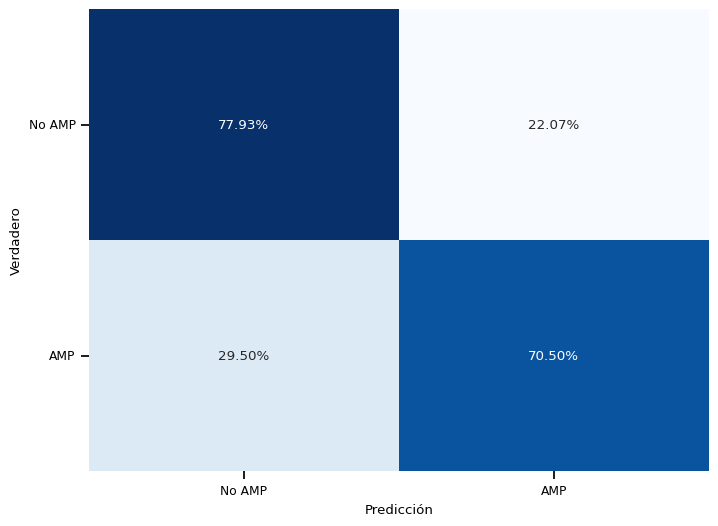

In [30]:
# Calcular la matriz de confusión
conf_matrix_FQ = confusion_matrix(y_test_FQ, y_pred_FQ)

# Normalizar la matriz de confusión para convertir a porcentajes
conf_matrix_percentage_FQ = conf_matrix_FQ.astype('float') / conf_matrix_FQ.sum(axis=1)[:, np.newaxis]

# Visualizar la matriz de confusión normalizada
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage_FQ, annot=True, fmt=".2%", cmap='Blues', cbar=False)
plt.title('')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')

# Añadir etiquetas de clases si están definidas
class_labels = ['No AMP', 'AMP'] 
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels, rotation=0)

# Guardar la figura 
plt.savefig("figuras/Matriz_de_confusion_FQ.png", bbox_inches='tight', dpi=300)
plt.show()

### Features importance

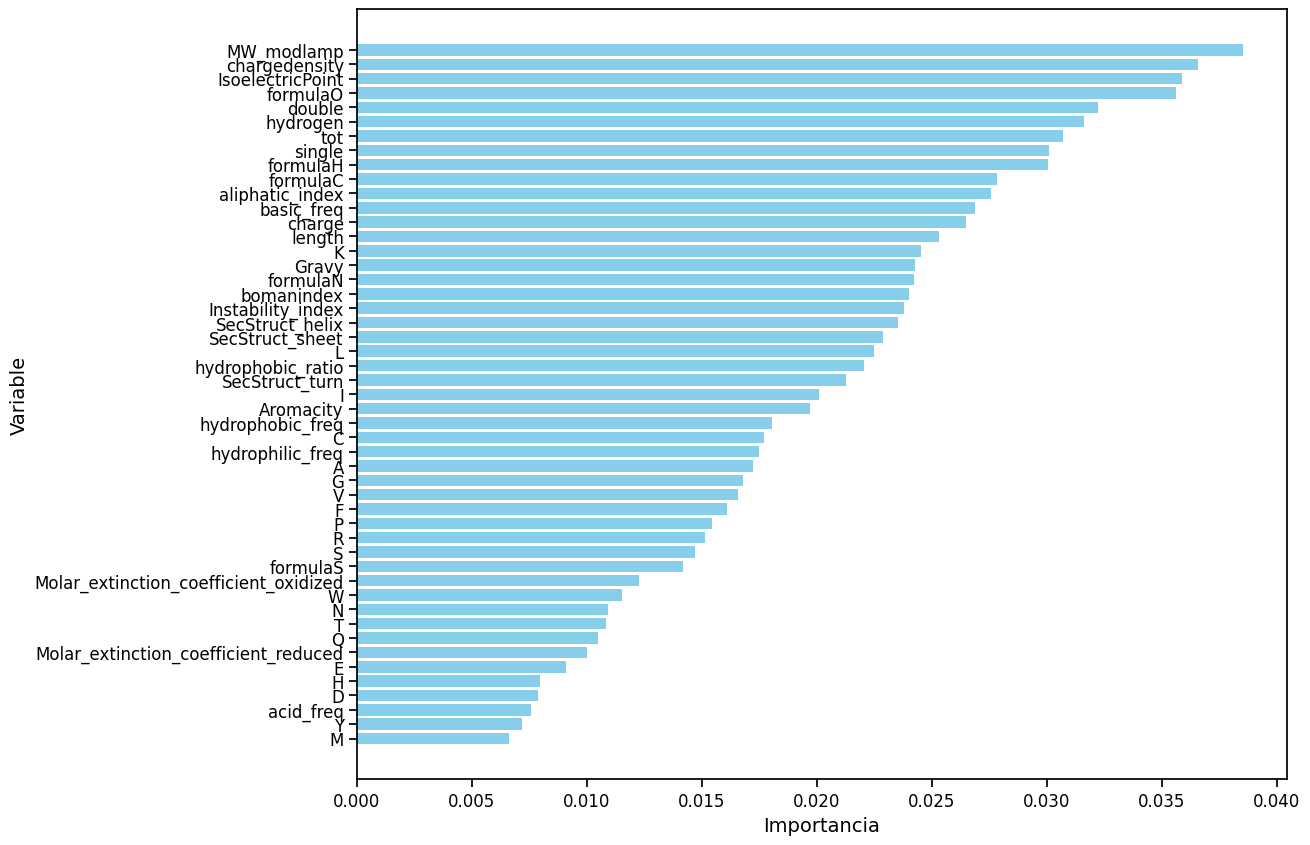

In [31]:
# Mostrar la importancia de cada predictor
feature_importances_FQ = pd.DataFrame(best_model_FQ.feature_importances_,
                                   index = X_train_FQ.columns,
                                   columns=['importancia']).sort_values('importancia', ascending=False)


# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))  
plt.barh(feature_importances_FQ.index, feature_importances_FQ['importancia'], color='skyblue')
plt.xlabel('Importancia', fontsize=14)  
plt.ylabel('Variable', fontsize=14)  
plt.title('', fontsize=16)  
plt.gca().invert_yaxis()  
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Guardar la figura
plt.savefig("figuras/importancia_FQs.png", bbox_inches='tight', dpi=300)
plt.show()

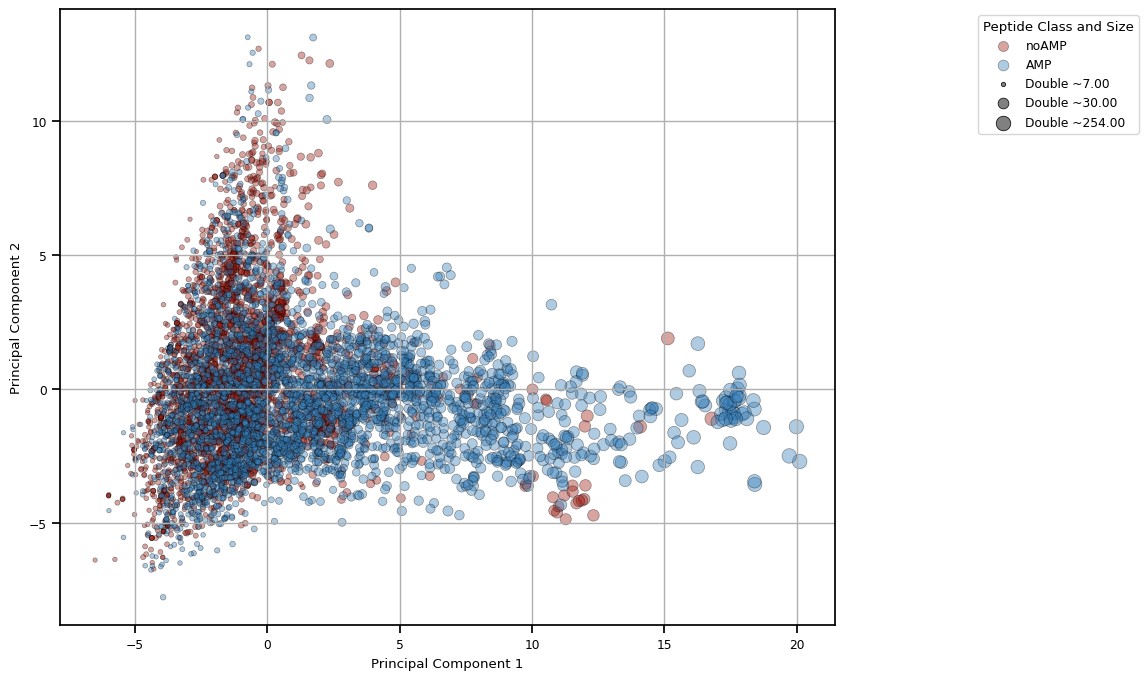

In [32]:
# Escalar el tamaño
size_scale = 100  
sizes = (df_muestra['double'] - df_muestra['double'].min()) / (df_muestra['double'].max() - df_muestra['double'].min()) * size_scale + 10

# Crear gráfico
plt.figure(figsize=(10, 8))
for i, target_name in zip([0, 1], ['noAMP', 'AMP']):
    subset = df_pca[df_muestra['AMP'] == i]
    size_subset = sizes[df_muestra['AMP'] == i]
    plt.scatter(subset[:, 0], subset[:, 1], s=size_subset, label=target_name, alpha=0.4,
                color='#377eb8' if target_name == 'AMP' else '#9c1c13', edgecolor='k', linewidth=0.5)

plt.title('')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2') 
plt.grid(True)

# Añadir leyendas para diferentes tamaños de esferas
size_examples = [10, 60, 110]  # Representan los tamaños mínimos, medios y máximos
for size in size_examples:
    plt.scatter([], [], s=size, color='gray', edgecolor='k', linewidth=0.5,
                label=f'Double ~{np.percentile(df_muestra["double"], (size-10)/size_scale*100):.2f}')

plt.legend(loc='upper right', title='Peptide Class and Size', bbox_to_anchor=(1.4, 1))

# Guardar la figura
plt.savefig("figuras/pca_por_predictor_importante_FQ_1.png", bbox_inches='tight', dpi=300)
plt.show()

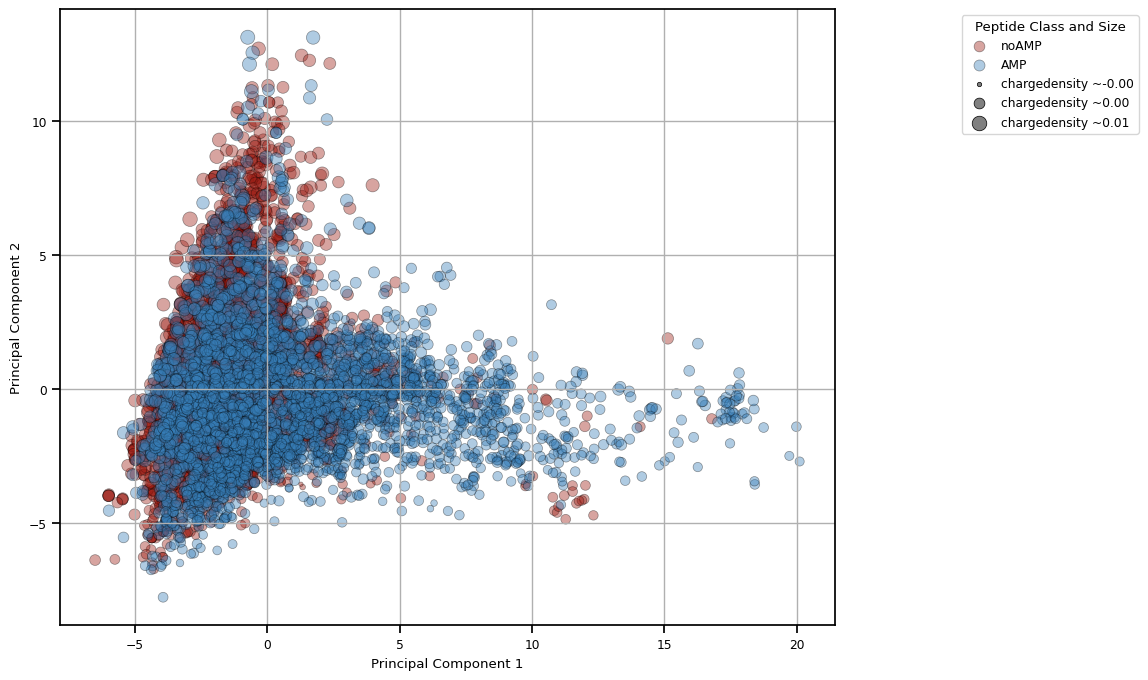

In [33]:
# Escalar el tamaño
size_scale = 100  
sizes = (df_muestra['chargedensity'] - df_muestra['chargedensity'].min()) / (df_muestra['chargedensity'].max() - df_muestra['chargedensity'].min()) * size_scale + 10

# Crear gráfico
plt.figure(figsize=(10, 8))
for i, target_name in zip([0, 1], ['noAMP', 'AMP']):
    subset = df_pca[df_muestra['AMP'] == i]
    size_subset = sizes[df_muestra['AMP'] == i]
    plt.scatter(subset[:, 0], subset[:, 1], s=size_subset, label=target_name, alpha=0.4,
                color='#377eb8' if target_name == 'AMP' else '#9c1c13', edgecolor='k', linewidth=0.5)

plt.title('')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2') 
plt.grid(True)

# Añadir leyendas para diferentes tamaños de esferas
size_examples = [10, 60, 110]  # Representan los tamaños mínimos, medios y máximos
for size in size_examples:
    plt.scatter([], [], s=size, color='gray', edgecolor='k', linewidth=0.5,
                label=f'chargedensity ~{np.percentile(df_muestra["chargedensity"], (size-10)/size_scale*100):.2f}')

plt.legend(loc='upper right', title='Peptide Class and Size', bbox_to_anchor=(1.4, 1))

# Guardar la figura 
plt.savefig("figuras/pca_por_predictor_importante_FQ_2.png", bbox_inches='tight', dpi=300)
plt.show()

# Encodings

El encoding de secuencias de aminoácidos es fundamental en el aprendizaje automático para transformar información biológica compleja en formatos numéricos que los modelos computacionales pueden procesar. Esta conversión permite que las técnicas de machine learning detecten patrones y realicen predicciones sobre la función, estructura y dinámica de las proteínas.


In [34]:
enconde_df= Encoding(dataset= data ,  col= 'sequence')

## Cálculo de Encodings

### One hot encoding

**Codificación "One-hot" (21 dimensiones):** En este método, cada aminoácido se representa como un vector donde sólo un elemento es 1 y el resto son 0s. El vector tiene una dimensión para cada posible aminoácido (20 aminoácidos estándar más uno adicional para posibles gaps o caracteres desconocidos), lo que permite una representación única y explícita de cada aminoácido en la secuencia. https://doi.org/10.1016/j.imavis.2018.04.004

In [35]:
hot_encoded = enconde_df.get_hot_encoded()
print(hot_encoded['One_hot_encoding'][0].shape)
print(hot_encoded['One_hot_encoding'])

(33, 21)
0        [[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1        [[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
2        [[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3        [[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4        [[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
                               ...                        
19240    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
19241    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
19242    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
19243    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
19244    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
Name: One_hot_encoding, Length: 19245, dtype: object


In [36]:
max_len_hot_encoded = max([matriz.size for matriz in hot_encoded['One_hot_encoding']])
print(max_len_hot_encoded,max_len_hot_encoded//21)

3150 150


In [37]:
from scipy.sparse import csr_matrix
import array


matriz= hot_encoded['One_hot_encoding'][0]

if isinstance(matriz, list):
    print("La matriz es una lista de Python.")
elif isinstance(matriz, array.array):
    print("La matriz es un array.array de Python.")
elif isinstance(matriz, pd.DataFrame):
    print("La matriz es un DataFrame de pandas.")
elif isinstance(matriz, csr_matrix):
    print("La matriz es una matriz dispersa de SciPy.")
else:
    print("Tipo desconocido: ", type(matriz))

Tipo desconocido:  <class 'numpy.ndarray'>


### NLF

**Non-linear Fisher transform (NLF) (18 dimensiones):** Esta codificación, basada en propiedades fisicoquímicas, asigna a cada aminoácido un vector de 18 dimensiones que representa diferentes características como la polaridad, el tamaño de la cadena lateral, etc. https://doi.org/10.1016/j.eswa.2010.09.005


In [38]:
nlf = enconde_df.get_nlf()
print(np.array(nlf['nlf'][0]).shape)
print(nlf['nlf'])

(33, 18)
0        [[0.42, 2.07, 0.67, 0.01, 1.1, 0.32, 0.2, 0.09...
1        [[0.42, 2.07, 0.67, 0.01, 1.1, 0.32, 0.2, 0.09...
2        [[0.42, 2.07, 0.67, 0.01, 1.1, 0.32, 0.2, 0.09...
3        [[0.42, 2.07, 0.67, 0.01, 1.1, 0.32, 0.2, 0.09...
4        [[0.42, 2.07, 0.67, 0.01, 1.1, 0.32, 0.2, 0.09...
                               ...                        
19240    [[0.7, 0.95, 0.36, 0.6, 0.09, 0.06, 0.55, 0.01...
19241    [[0.7, 0.95, 0.36, 0.6, 0.09, 0.06, 0.55, 0.01...
19242    [[0.7, 0.95, 0.36, 0.6, 0.09, 0.06, 0.55, 0.01...
19243    [[0.7, 0.95, 0.36, 0.6, 0.09, 0.06, 0.55, 0.01...
19244    [[0.7, 0.95, 0.36, 0.6, 0.09, 0.06, 0.55, 0.01...
Name: nlf, Length: 19245, dtype: object


In [39]:
max_len_nlf = max([sum([len(fila) for fila in matriz]) for matriz in nlf['nlf']])
print(max_len_nlf, 150*18)

2700 2700


In [40]:
matriz= nlf['nlf'][0]

if isinstance(matriz, list):
    print("La matriz es una lista de Python.")
elif isinstance(matriz, array.array):
    print("La matriz es un array.array de Python.")
elif isinstance(matriz, pd.DataFrame):
    print("La matriz es un DataFrame de pandas.")
elif isinstance(matriz, csr_matrix):
    print("La matriz es una matriz dispersa de SciPy.")
else:
    print("Tipo desconocido: ", type(matriz))

La matriz es una lista de Python.


### Blosum62

 **BLOSUM 62 (23 dimensiones):** Basado en la matriz de sustitución de bloques de aminoácidos, este método representa cada aminoácido con un vector de 23 dimensiones. Las matrices BLOSUM capturan las probabilidades de sustitución mutua entre aminoácidos que han evolucionado funcionalmente de una forma común. https://doi.org/10.1038/nbt0308-274


In [41]:
blosum = enconde_df.get_blosum()
print(np.array(blosum['blosum'][0]).shape)
print(blosum['blosum'])

(33, 23)
0        [[4, -1, -2, -2, 0, -1, -1, 0, -2, -1, -1, -1,...
1        [[4, -1, -2, -2, 0, -1, -1, 0, -2, -1, -1, -1,...
2        [[4, -1, -2, -2, 0, -1, -1, 0, -2, -1, -1, -1,...
3        [[4, -1, -2, -2, 0, -1, -1, 0, -2, -1, -1, -1,...
4        [[4, -1, -2, -2, 0, -1, -1, 0, -2, -1, -1, -1,...
                               ...                        
19240    [[-2, -2, -2, -3, -2, -1, -2, -3, 2, -1, -1, -...
19241    [[-2, -2, -2, -3, -2, -1, -2, -3, 2, -1, -1, -...
19242    [[-2, -2, -2, -3, -2, -1, -2, -3, 2, -1, -1, -...
19243    [[-2, -2, -2, -3, -2, -1, -2, -3, 2, -1, -1, -...
19244    [[-2, -2, -2, -3, -2, -1, -2, -3, 2, -1, -1, -...
Name: blosum, Length: 19245, dtype: object


In [42]:
max_len_blosum = max([sum([len(fila) for fila in matriz]) for matriz in blosum['blosum']])
print(max_len_blosum,150*23)

3450 3450


In [43]:
matriz= blosum['blosum'][0]

if isinstance(matriz, list):
    print("La matriz es una lista de Python.")
elif isinstance(matriz, array.array):
    print("La matriz es un array.array de Python.")
elif isinstance(matriz, pd.DataFrame):
    print("La matriz es un DataFrame de pandas.")
elif isinstance(matriz, csr_matrix):
    print("La matriz es una matriz dispersa de SciPy.")
else:
    print("Tipo desconocido: ", type(matriz))

La matriz es una lista de Python.


### Zscale

**Z-scale (5 dimensiones):** Este método utiliza 5 dimensiones principales para describir las propiedades fisicoquímicas de los aminoácidos, como la hidrofobicidad, el volumen molecular y la composición electrónica. https://doi.org/10.1021/jm9700575


In [44]:
zscale = enconde_df.get_zscale()
print(np.array(zscale['zscale'][0]).shape)
print(zscale['zscale'])

(33, 5)
0        [[0.24, -2.32, 0.6, -0.14, 1.3], [0.24, -2.32,...
1        [[0.24, -2.32, 0.6, -0.14, 1.3], [0.24, -2.32,...
2        [[0.24, -2.32, 0.6, -0.14, 1.3], [0.24, -2.32,...
3        [[0.24, -2.32, 0.6, -0.14, 1.3], [0.24, -2.32,...
4        [[0.24, -2.32, 0.6, -0.14, 1.3], [0.24, -2.32,...
                               ...                        
19240    [[-2.54, 2.44, 0.43, 0.04, -1.47], [-2.54, 2.4...
19241    [[-2.54, 2.44, 0.43, 0.04, -1.47], [-2.54, 2.4...
19242    [[-2.54, 2.44, 0.43, 0.04, -1.47], [-2.54, 2.4...
19243    [[-2.54, 2.44, 0.43, 0.04, -1.47], [-2.54, 2.4...
19244    [[-2.54, 2.44, 0.43, 0.04, -1.47], [-2.54, 2.4...
Name: zscale, Length: 19245, dtype: object


In [45]:
max_len_zscale =  max([sum([len(fila) for fila in matriz]) for matriz in zscale['zscale']])
print(max_len_zscale,150*5)

750 750


In [46]:
matriz= zscale['zscale'][0]

if isinstance(matriz, list):
    print("La matriz es una lista de Python.")
elif isinstance(matriz, array.array):
    print("La matriz es un array.array de Python.")
elif isinstance(matriz, pd.DataFrame):
    print("La matriz es un DataFrame de pandas.")
elif isinstance(matriz, csr_matrix):
    print("La matriz es una matriz dispersa de SciPy.")
else:
    print("Tipo desconocido: ", type(matriz))

La matriz es una lista de Python.


In [47]:
df_encode = enconde_df.result

### EDSSMat75

**EDSSMat75 (5 dimensiones):** EDSSMat es una serie de matrices de puntuación de sustitución diseñada para alinear proteínas o regiones desordenadas intrínsecamente. En comparación con otras matrices como BLOSUM y PAM, EDSSMat tiene valores E más pequeños al alinear regiones desordenadas, y EDSSMat62 puede identificar tanto homólogos cercanos como distantes de proteínas desordenadas específicas. https://doi.org/10.1038/s41598-019-52532-8

In [48]:
# Cargar la matriz desde el archivo Excel

excel_path = 'encoding_eddf75.xlsx'
matrix_df = pd.read_excel(excel_path, index_col=0) 


In [49]:
def encode_sequence_to_vector(sequence, encoding_matrix):
    encoded_sequence = []
    for aminoacid in sequence:
        if aminoacid in encoding_matrix.index:
            encoded_vector = encoding_matrix.loc[aminoacid].tolist()
            encoded_sequence.extend(encoded_vector)  # Extend para aplanar la lista
        else:
            # En caso de que el aminoácido no esté en la matriz
            encoded_sequence.extend([0] * encoding_matrix.shape[1])
    return encoded_sequence

In [50]:
df_encode['EDSSMat75'] = df_encode['sequence'].apply(lambda x: encode_sequence_to_vector(x, matrix_df))

In [51]:
max_len_EDSSMat75 = max([len(matriz) for matriz in df_encode['EDSSMat75']])
print(max_len_EDSSMat75,150*20)

3000 3000


In [52]:
matriz= df_encode['EDSSMat75'][0]

if isinstance(matriz, list):
    print("La matriz es una lista de Python.")
elif isinstance(matriz, array.array):
    print("La matriz es un array.array de Python.")
elif isinstance(matriz, pd.DataFrame):
    print("La matriz es un DataFrame de pandas.")
elif isinstance(matriz, csr_matrix):
    print("La matriz es una matriz dispersa de SciPy.")
else:
    print("Tipo desconocido: ", type(matriz))

La matriz es una lista de Python.


In [53]:
# Guardar el DataFrame en un archivo CSV

df_encode.to_csv('archivos/db_encode.csv', index=False)

In [54]:
df_encode.columns

Index(['ID_Peptide', 'PubMed_ID', 'UniProt_ID', 'APD3_ID', 'sequence',
       'Activity', 'db_source', 'Targets', 'Code', 'AMP', 'One_hot_encoding',
       'nlf', 'blosum', 'zscale', 'EDSSMat75'],
      dtype='object')

## Aplanado de encodes

Para procesar los datos correctamente, es fundamental convertir todos los elementos a matrices de NumPy, ya que actualmente solo el "one hot encode" está en ese formato, mientras que el resto son listas de Python. Este paso es esencial para asegurar que las operaciones matemáticas y de manipulación de datos se realicen de manera eficiente y uniforme.

In [55]:
def convertir_a_numpy(df, columnas):
    for columna in columnas:
        # Aplicar la conversión sólo si el elemento no es un ndarray
        df[columna] = df[columna].apply(lambda x: np.array(x) if not isinstance(x, np.ndarray) else x)
    
    return df

# Lista de columnas para convertir, excluyendo 'One_hot_encoding'
columnas_para_convertir = ['nlf', 'blosum', 'zscale', 'EDSSMat75']

# Aplicar la función al DataFrame
df_encode = convertir_a_numpy(df_encode, columnas_para_convertir)

In [56]:
# Verificar los tipos de las columnas convertidas
for col in columnas_para_convertir:
    print(f"Tipo de datos en columna {col}: {type(df_encode[col].iloc[0])}")


Tipo de datos en columna nlf: <class 'numpy.ndarray'>
Tipo de datos en columna blosum: <class 'numpy.ndarray'>
Tipo de datos en columna zscale: <class 'numpy.ndarray'>
Tipo de datos en columna EDSSMat75: <class 'numpy.ndarray'>


Un desafío es que las matrices tienen longitudes diferentes. Para solucionar esto, se deben aplanar y luego concatenar, creando un solo vector. El aplanamiento convierte matrices multidimensionales en vectores unidimensionales, y la concatenación asegura que todos los vectores resultantes formen un único vector continuo. Esto es esencial para preparar los datos para modelos de machine learning y análisis que requieren entradas de longitud fija.

In [57]:
def aplanar_y_concatenar_con_padding(df, columnas):
    # Determinar la longitud máxima después de aplanar
    max_len = []
    for col in columnas:
        max_len.append(max([matriz.size for matriz in df[col]]))
    
    print(max_len)

    def pad_and_flatten(row):
        # Aplanar cada matriz y aplicar padding si es necesario
        flattened = [row[col].flatten() for col in columnas]
        padded = [np.pad(f, (0, max_len[i] - f.size), mode='constant') for i,f in enumerate(flattened)]
        return np.concatenate(padded)

    # Aplicar a cada fila
    df['vector_concatenado'] = df.apply(pad_and_flatten, axis=1)
    return df

In [58]:
# Nombres de las columnas que contienen las matrices
columnas_encode = ['One_hot_encoding', 'nlf', 'blosum', 'zscale', 'EDSSMat75']

# Aplicar la función modificada
df_encode = aplanar_y_concatenar_con_padding(df_encode, columnas_encode)

[3150, 2700, 3450, 750, 3000]


In [59]:
# Comprobamos las longitudes máximas de cada encode

print(max_len_hot_encoded, max_len_nlf, max_len_blosum, max_len_zscale, max_len_EDSSMat75)

3150 2700 3450 750 3000


In [60]:
# Comprobamos las longitude total del vector concatenado y la suma de las longitudes máximas para ver 
# si está bien hecha la operación

print(len(df_encode['vector_concatenado'][0]), 
      max_len_hot_encoded+max_len_nlf+ max_len_blosum+ max_len_zscale+ max_len_EDSSMat75)

13050 13050


In [61]:
#Guardamos el dataframe
df_encode.to_csv('archivos/db_encode_aplanado.csv', index=False)

In [62]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19245 entries, 0 to 19244
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Peptide          19245 non-null  object 
 1   PubMed_ID           234 non-null    object 
 2   UniProt_ID          4792 non-null   object 
 3   APD3_ID             2941 non-null   float64
 4   sequence            19245 non-null  object 
 5   Activity            19245 non-null  object 
 6   db_source           19245 non-null  object 
 7   Targets             14378 non-null  object 
 8   Code                19245 non-null  int64  
 9   AMP                 13997 non-null  object 
 10  One_hot_encoding    19245 non-null  object 
 11  nlf                 19245 non-null  object 
 12  blosum              19245 non-null  object 
 13  zscale              19245 non-null  object 
 14  EDSSMat75           19245 non-null  object 
 15  vector_concatenado  19245 non-null  object 
dtypes: f

## Estadística

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Eliminar filas donde 'AMP' sea NaN
df = df_encode.dropna(subset=['AMP'])

# Transforma la columna 'AMP' a valores numéricos
le = LabelEncoder()
df['AMP'] = le.fit_transform(df['AMP'])
df_AMP = df[df['AMP'] == 1]
df_nAMP = df[df['AMP'] == 0]

# Muestreo aleatorio de 3000 elementos de cada clase
sample_AMP = df_AMP.sample(n=3500, random_state=42)
sample_nAMP = df_nAMP.sample(n=3500, random_state=42)

# ComFQar las muestras para obtener la muestra final balanceada
df_encode_muestra = pd.concat([sample_AMP, sample_nAMP])

# Revolver la muestra para evitar cualquier sesgo en el orden
df_encode_muestra = df_encode_muestra.sample(frac=1, random_state=42).reset_index(drop=True)


C:\Users\noral\AppData\Local\Temp\ipykernel_17336\1896884025.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AMP'] = le.fit_transform(df['AMP'])


### Random Forest

Hemos definido y ajustado un modelo de RandomForestClassifier utilizando GridSearchCV para encontrar la mejor combinación de hiperparámetros. La cuadrícula de parámetros incluye n_estimators (100, 200, 300), max_depth (None, 10, 20, 30), min_samples_split (2, 5, 10), min_samples_leaf (1, 2, 4) y max_features (‘auto’, ‘sqrt’, ‘log2’). GridSearchCV realiza una búsqueda exhaustiva con validación cruzada de 5 pliegues, evaluando la exactitud y paralelizando el proceso. El mejor modelo ajustado se selecciona con la mejor puntuación de validación cruzada y se almacena para predicciones futuras.

In [64]:

# Separar las características y la variable objetivo
y = df_encode_muestra['AMP']
X = np.vstack(df_encode_muestra['vector_concatenado'].values)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train_encode, X_test_encode, y_train_encode, y_test_encode = train_test_split(X, y, test_size=0.8, stratify=y, random_state=42)

# Definir el modelo
modelo_rf_encode = RandomForestClassifier(random_state=42)

# Definir los parámetros de búsqueda
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Ejecutar GridSearchCV
grid_search_rf_encode = GridSearchCV(modelo_rf_encode, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_rf_encode.fit(X_train_encode, y_train_encode)

# Obtener el mejor modelo
best_model_rf_encode = grid_search_rf_encode.best_estimator_

# Guardar el mejor modelo en un archivo
model_filename_rf_encode = 'best_models/best_random_forest_model_encodes.pkl'
joblib.dump(best_model_rf_encode, model_filename_rf_encode)

# Mostrar los mejores parámetros
print("Mejores parámetros:", grid_search_rf_encode.best_params_)
print("Mejor puntuación:", grid_search_rf_encode.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Mejores parámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Mejor puntuación: 0.7385714285714287


In [65]:
# Evaluar el mejor modelo
predicciones_encode = best_model_rf_encode.predict(X_test_encode)
exactitud_encode = accuracy_score(y_test_encode, predicciones_encode)
precision_encode = precision_score(y_test_encode, predicciones_encode)
recall_encode = recall_score(y_test_encode, predicciones_encode)
f1_encode = f1_score(y_test_encode, predicciones_encode)

# Guardar los mejores resultados en la estructura de datos
best_results['RF_Classifier_AMP'] = {
    'Best Parameters': grid_search_rf_encode.best_params_,
    'Accuracy': exactitud_encode,
    'Precision': precision_encode,
    'Recall': recall_encode,
    'F1 Score': f1_encode,
    'Model File': model_filename_rf_encode
}

# Mostrar las métricas
print(f'Best Parameters: {grid_search_rf_encode.best_params_}')
print(f'Accuracy: {exactitud_encode}')
print(f'Precision: {precision_encode}')
print(f'Recall: {recall_encode}')
print(f'F1 Score: {f1_encode}')

# Para verificar los mejores resultados almacenados
print(best_results)


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.7198214285714286
Precision: 0.7498984977669508
Recall: 0.6596428571428572
F1 Score: 0.701881056431693
{'RF_Classifier_FQ': {'Best Parameters': {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, 'Accuracy': 0.7425, 'Precision': 0.7436372431880802, 'Recall': 0.7421419670272912, 'F1 Score': 0.7419939922991827}, 'RF_Classifier_AMP': {'Best Parameters': {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}, 'Accuracy': 0.7198214285714286, 'Precision': 0.7498984977669508, 'Recall': 0.6596428571428572, 'F1 Score': 0.701881056431693, 'Model File': 'best_models/best_random_forest_model_encodes.pkl'}}


### Matriz de Confusión

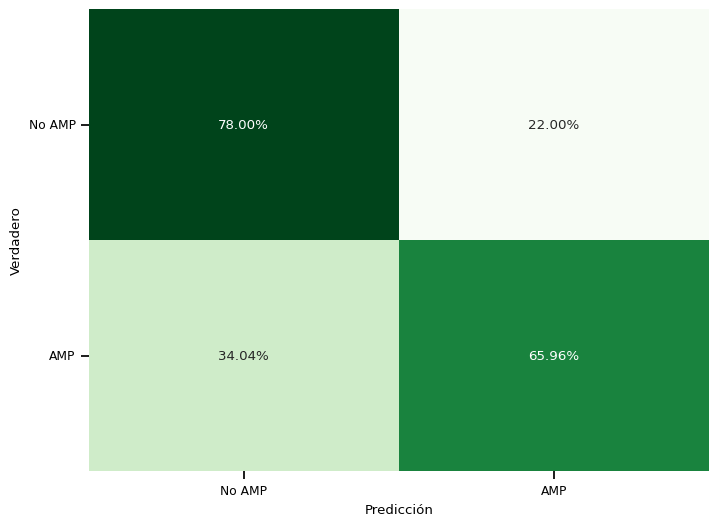

In [66]:

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import numpy as np

# Calcular la matriz de confusión
cm_encode = confusion_matrix(y_test_encode, predicciones_encode)

# Normalizar la matriz de confusión para mostrar porcentajes
cm_normalized_encode = cm_encode.astype('float') / cm_encode.sum(axis=1)[:, np.newaxis]

# Visualizar la matriz de confusión normalizada
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized_encode, annot=True, fmt=".2%", cmap='Greens', cbar=False)
plt.title('')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')

# Añadir etiquetas de clases si están definidas
class_labels = ['No AMP', 'AMP'] 
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels, rotation=0)

# Guardar la figura 
plt.savefig("figuras/matriz_de_confusion_encodings.png", bbox_inches='tight', dpi=300)
plt.show()

### Feature Importances

Como tenemos todos los encodings en un solo vector, calculamos la importancia de cada uno de los componentes de ese vector.

In [67]:
# Calcular la importancia de las características del mejor modelo
importancias_encode = best_model_rf_encode.feature_importances_
indices_encode = np.argsort(importancias_encode)[::-1]  # Ordenar las características por importancia

norma_encode = sum(importancias_encode)
importancias = importancias_encode / norma_encode
print(sum(importancias))  # Asegurarse de que la suma de las importancias es 1

0.9999999999999998


Seguidamente agrupamos las importancias cociendo la longitud y posición que ocupa cada encoding en el vector.

In [68]:
# Calcular la importancia de cada encoding
importancia_One_Hot = sum(importancias[0:max_len_hot_encoded])
inicio = max_len_hot_encoded
importancia_nlf = sum(importancias[inicio:inicio + max_len_nlf])
inicio = inicio + max_len_nlf
importancia_blosum = sum(importancias[inicio:inicio + max_len_blosum])
inicio = inicio + max_len_blosum
importancia_zscale = sum(importancias[inicio:inicio + max_len_zscale])
inicio = inicio + max_len_zscale
importancia_EDSSMat75 = sum(importancias[inicio:inicio + max_len_EDSSMat75])

importancias_encodings = np.array([importancia_One_Hot, importancia_nlf, 
                                   importancia_blosum, importancia_zscale, importancia_EDSSMat75])

indices = np.argsort(importancias_encodings)  # Índices ordenados por importancia

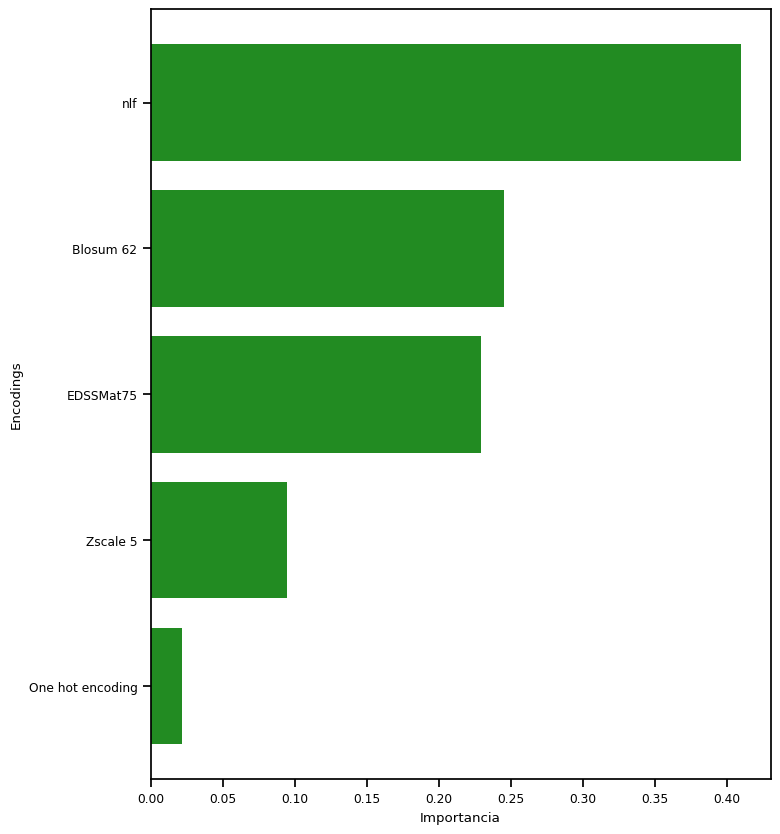

In [69]:
plt.figure(figsize=(8, 10))
plt.title("")

# Asegurarse de que 'indices' sea un array de enteros
indices = indices.astype(int)

plt.barh(range(len(indices)), importancias_encodings[indices], color="forestgreen", align="center")

# Añadir etiquetas de clases
class_labels = ['One hot encoding', 'nlf', 'Blosum 62', 'Zscale 5', 'EDSSMat75'] 
etiquetas_reorganizadas = np.array(class_labels)[indices]

plt.yticks(np.arange(len(class_labels)), etiquetas_reorganizadas)
plt.ylabel('Encodings')
plt.xlabel('Importancia')

# Guardar la figura 
plt.savefig("figuras/importancia_encodings.png", bbox_inches='tight', dpi=300)
plt.show()

# Descriptores y Encodings

## Preprocesamiento

In [70]:
# Realizar el merge
df = pd.merge(df_encode, df_fq_prop, on='ID_Peptide', how='inner')

# Remover sufijos _x y _y, conservando las columnas del primer DataFrame en caso de conflicto
df.columns = [col.replace('_x', '') for col in df.columns]

# Eliminar las columnas con _y 
df.drop(columns=[col for col in df.columns if col.endswith('_y')], inplace=True)

# Guardar el DataFrame combinado en un nuevo archivo CSV
df.to_csv('archivos/db_all.csv', index=False)

In [71]:
fisicoquimicos = df[['length',
       'charge', 'chargedensity', 'formulaC', 'formulaH', 'formulaN',
       'formulaO', 'formulaS', 'tot', 'hydrogen', 'single', 'double',
       'MW_modlamp', 'Gravy', 'Aromacity', 'IsoelectricPoint',
       'Instability_index', 'SecStruct_helix', 'SecStruct_turn',
       'SecStruct_sheet', 'Molar_extinction_coefficient_reduced',
       'Molar_extinction_coefficient_oxidized', 'aliphatic_index',
       'bomanindex', 'hydrophobic_ratio', 'A', 'R', 'N', 'D', 'C', 'E', 'Q',
       'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'hydrophobic_freq', 'hydrophilic_freq',
       'basic_freq', 'acid_freq']]

In [72]:
# Función para concatenar los números con el vector aplanado
def concat_and_flatten(row1, vector):
    # Convertir las columnas numéricas a lista
    num_list = row1.values.tolist()
    # Concatenar las dos listas
    combined_list = num_list + vector.tolist()
    return combined_list


# Aplicar la función a cada fila y crear la nueva columna
result_column = [concat_and_flatten(fisicoquimicos.iloc[i], df.iloc[i]['vector_concatenado']) for i in range(len(df))]

# Crear el nuevo dataframe con la columna resultante
df_final = df.copy()
df_final['vector_concatenado_todos'] = result_column


df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19245 entries, 0 to 19244
Data columns (total 68 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID_Peptide                             19245 non-null  object 
 1   PubMed_ID                              234 non-null    object 
 2   UniProt_ID                             4792 non-null   object 
 3   APD3_ID                                2941 non-null   float64
 4   sequence                               19245 non-null  object 
 5   Activity                               19245 non-null  object 
 6   db_source                              19245 non-null  object 
 7   Targets                                14378 non-null  object 
 8   Code                                   19245 non-null  int64  
 9   AMP                                    13997 non-null  object 
 10  One_hot_encoding                       19245 non-null  object 
 11  nl

## Random Forest

Hemos definido y ajustado un modelo de RandomForestClassifier utilizando GridSearchCV para encontrar la mejor combinación de hiperparámetros. La cuadrícula de parámetros incluye n_estimators (100, 200, 300), max_depth (None, 10, 20, 30), min_samples_split (2, 5, 10), min_samples_leaf (1, 2, 4) y max_features (‘auto’, ‘sqrt’, ‘log2’). GridSearchCV realiza una búsqueda exhaustiva con validación cruzada de 5 pliegues, evaluando la exactitud y paralelizando el proceso. El mejor modelo ajustado se selecciona con la mejor puntuación de validación cruzada y se almacena para predicciones futuras.

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Preprocesamiento
df = df_final.dropna(subset=['AMP'])
le = LabelEncoder()
df['AMP'] = le.fit_transform(df['AMP'])

df_AMP = df[df['AMP'] == 1]
df_nAMP = df[df['AMP'] == 0]

sample_AMP = df_AMP.sample(n=3500, random_state=42)
sample_nAMP = df_nAMP.sample(n=3500, random_state=42)

df_muestra_todo = pd.concat([sample_AMP, sample_nAMP])
df_muestra_todo = df_muestra_todo.sample(frac=1, random_state=42).reset_index(drop=True)

X = np.stack(df_muestra_todo['vector_concatenado_todos'].values)
y = df_muestra_todo['AMP']

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X, y, test_size=0.8, random_state=42)

# Definir y ajustar el modelo
modelo_rf_all = RandomForestClassifier(random_state=42)

# Definir los parámetros de búsqueda
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_search_rf_all = GridSearchCV(modelo_rf_all, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_rf_all.fit(X_train_all, y_train_all)

best_model_rf_all = grid_search_rf_all.best_estimator_

# Guardar el mejor modelo
model_filename_rf_all = 'best_models/best_random_forest_model_all.pkl'
joblib.dump(best_model_rf_all, model_filename_rf_all)

# Mostrar los mejores parámetros
print("Mejores parámetros:", grid_search_rf_all.best_params_)
print("Mejor puntuación:", grid_search_rf_all.best_score_)


C:\Users\noral\AppData\Local\Temp\ipykernel_17336\3001523764.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AMP'] = le.fit_transform(df['AMP'])


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Mejores parámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mejor puntuación: 0.745


In [74]:
# Evaluar el mejor modelo
predicciones_all = best_model_rf_all.predict(X_test_all)
exactitud_all = accuracy_score(y_test_all, predicciones_all)
precision_all = precision_score(y_test_all, predicciones_all, average='macro')
recall_all = recall_score(y_test_all, predicciones_all, average='macro')
f1_all = f1_score(y_test_all, predicciones_all, average='macro')

# Guardar y mostrar los mejores resultados
best_results = {}
best_results['RF_Classifier_ALL'] = {
    'Best Parameters': grid_search_rf_all.best_params_,
    'Accuracy': exactitud_all,
    'Precision': precision_all,
    'Recall': recall_all,
    'F1 Score': f1_all,
    'Model File': model_filename_rf_all
}

# Mostrar resultados
print(f"Best Parameters: {grid_search_rf_all.best_params_}")
print(f"Accuracy: {exactitud_all}")
print(f"Precision: {precision_all}")
print(f"Recall: {recall_all}")
print(f"F1 Score: {f1_all}")

# Mostrar los mejores resultados almacenados
print(best_results)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.7321428571428571
Precision: 0.7328040040787787
Recall: 0.7318527449810065
F1 Score: 0.7317728131054271
{'RF_Classifier_ALL': {'Best Parameters': {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, 'Accuracy': 0.7321428571428571, 'Precision': 0.7328040040787787, 'Recall': 0.7318527449810065, 'F1 Score': 0.7317728131054271, 'Model File': 'best_models/best_random_forest_model_all.pkl'}}


### Matriz de confusión

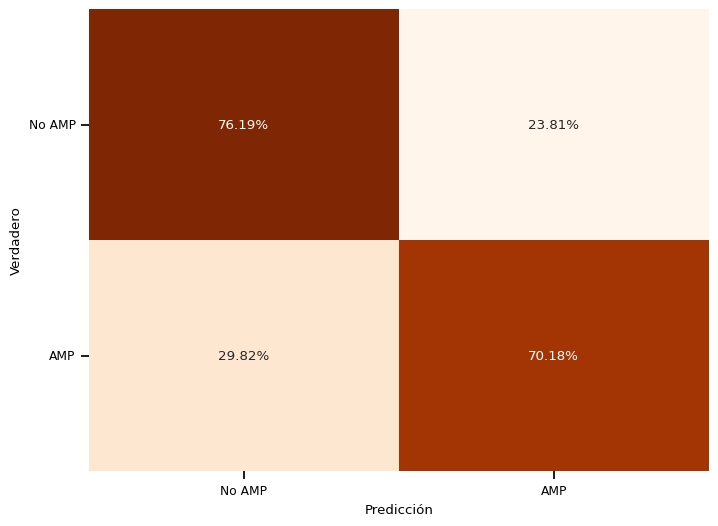

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Calcular la matriz de confusión
cm_all = confusion_matrix(y_test_all, predicciones_all)

# Normalizar la matriz de confusión para mostrar porcentajes
cm_normalized_all = cm_all.astype('float') / cm_all.sum(axis=1)[:, np.newaxis]

# Visualizar la matriz de confusión normalizada
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized_all, annot=True, fmt=".2%", cmap='Oranges', cbar=False)
plt.title('')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')

# Añadir etiquetas de clases si están definidas
class_labels = ['No AMP', 'AMP'] 
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels, rotation=0)

# Guardar la figura 
plt.savefig("figuras/matriz_de_confusion_ALL.png", bbox_inches='tight', dpi=300)
plt.show()

### Importance features

Hemos creado un unico vector en el que tenemos todas las propiedades fisicoquímicas y el vector concatenado de encodings que hemos hecho previamente. Así, al igual que antes, hay que determinar y calcular, conociendo el orden y posición de cada predictor en el vector, la importancia para cada predictor y cada encoding.

In [76]:
# Parámetros iniciales
parametros_iniciales_all = ['length', 'charge', 'chargedensity', 'formulaC', 'formulaH', 'formulaN',
                            'formulaO', 'formulaS', 'tot', 'hydrogen', 'single', 'double', 'MW_modlamp',
                            'Gravy', 'Aromacity', 'IsoelectricPoint', 'Instability_index', 'SecStruct_helix',
                            'SecStruct_turn', 'SecStruct_sheet', 'Molar_extinction_coefficient_reduced',
                            'Molar_extinction_coefficient_oxidized', 'aliphatic_index', 'bomanindex',
                            'hydrophobic_ratio', 'A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L',
                            'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'hydrophobic_freq', 'hydrophilic_freq',
                            'basic_freq', 'acid_freq']

# Calcular la importancia de las características del mejor modelo
importancias = best_model_rf_all.feature_importances_
norma_all = sum(importancias)
importancias = importancias / norma_all

# Crear un diccionario para almacenar las importancias
importancias_dict_all = {}

# Añadir las importancias de los parámetros iniciales al diccionario
for i, parametro in enumerate(parametros_iniciales_all):
    importancias_dict_all[parametro] = importancias[i]


In [77]:
# Calcular la importancia de los otros grupos de características
inicio = len(parametros_iniciales_all)
importancia_One_Hot = sum(importancias[inicio:inicio + max_len_hot_encoded])
inicio += max_len_hot_encoded
importancia_nlf = sum(importancias[inicio:inicio + max_len_nlf])
inicio += max_len_nlf
importancia_blosum = sum(importancias[inicio:inicio + max_len_blosum])
inicio += max_len_blosum
importancia_zscale = sum(importancias[inicio:inicio + max_len_zscale])
inicio += max_len_zscale
importancia_EDSSMat75 = sum(importancias[inicio:inicio + max_len_EDSSMat75])

# Añadir las importancias agrupadas de los encodings al diccionario
importancias_dict_all['One_Hot_Encoding'] = importancia_One_Hot
importancias_dict_all['nlf'] = importancia_nlf
importancias_dict_all['Blosum 62'] = importancia_blosum
importancias_dict_all['Zscale 5'] = importancia_zscale
importancias_dict_all['EDSSMat75'] = importancia_EDSSMat75

In [78]:
# Convertir el diccionario a un DataFrame para facilitar el análisis
importancias_df_all = pd.DataFrame(list(importancias_dict_all.items()), columns=['Feature', 'Importance'])

# Ordenar el DataFrame por importancia
importancias_df_all = importancias_df_all.sort_values(by='Importance', ascending=False)

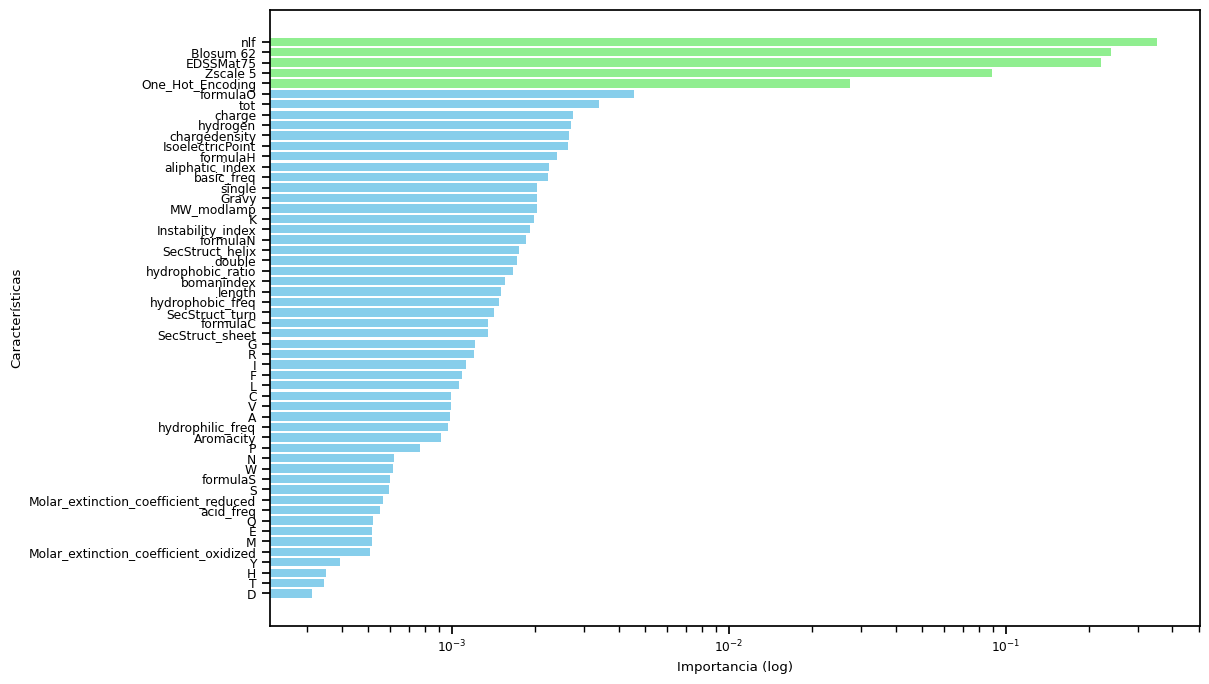

In [79]:
# Identificar encodings
encoding_features = ['One_Hot_Encoding', 'nlf', 'Blosum 62', 'Zscale 5', 'EDSSMat75']

# Asignar colores: rojo para encodings y azul para otros
colors = ['lightgreen' if feature in encoding_features else 'skyblue' for feature in importancias_df_all['Feature']]

# Graficar la importancia de las características con escala logarítmica
plt.figure(figsize=(12, 8))
plt.barh(importancias_df_all['Feature'], importancias_df_all['Importance'], color=colors)
plt.xscale('log')
plt.xlabel('Importancia (log)')
plt.ylabel('Características')
plt.title('')
plt.gca().invert_yaxis()

# Guardar la figura 
plt.savefig("figuras/importancias_ALL.png", bbox_inches='tight', dpi=300)
plt.show()

## Comparación de todos los modelos

Se comparan las métricas obtenidas para cada modelo (utilizando predictores fisicoquímicos, encodings o la combinación de todos los predictores) mediante un gráfico de radar.

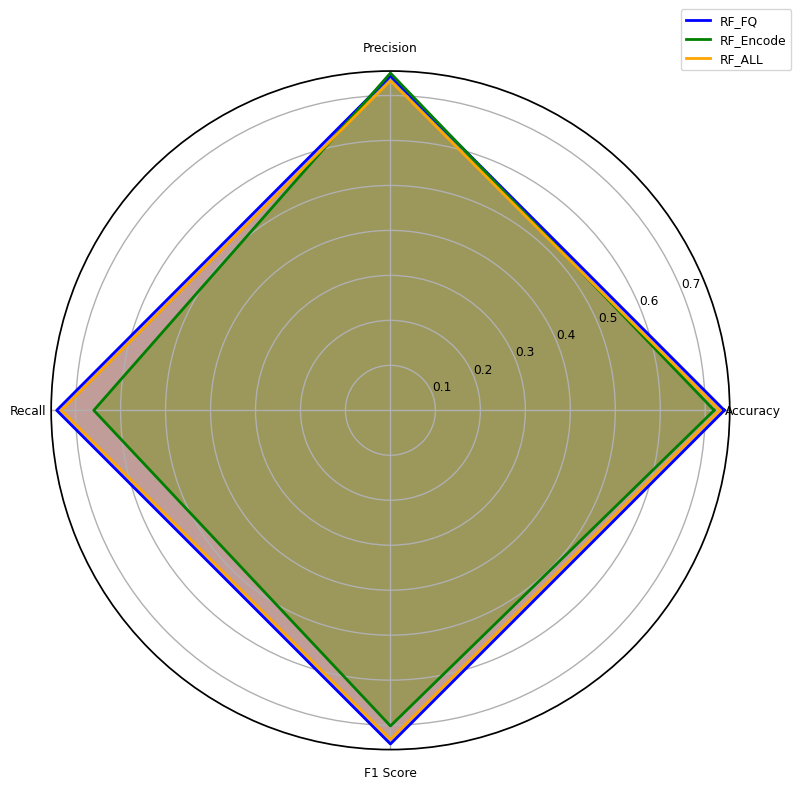

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ya tenemos las métricas calculadas y las guardamos en un diccionario
best_results = {
    'RF_FQ': {
        'Accuracy': accuracy_FQ,
        'Precision': precision_FQ,
        'Recall': recall_FQ,
        'F1 Score': f1_FQ
    },
    'RF_Encode': {
        'Accuracy': exactitud_encode,
        'Precision': precision_encode,
        'Recall': recall_encode,
        'F1 Score': f1_encode
    },
    'RF_ALL': {
        'Accuracy': exactitud_all,
        'Precision': precision_all,
        'Recall': recall_all,
        'F1 Score': f1_all
    }
}

# Convertir el diccionario a un DataFrame para facilitar el análisis y la visualización
df_metrics = pd.DataFrame(best_results).T

# Función para crear un gráfico de radar
def make_radar_chart(df, colors):
    # Número de variables
    categories = df.columns
    N = len(categories)
    
    # Ángulos para cada variable
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    # Inicializar el gráfico de radar
    ax = plt.subplot(111, polar=True)
    
    for i, model in enumerate(df.index):
        # Valores del modelo
        values = df.loc[model].values.flatten().tolist()
        values += values[:1]  # cerrar el gráfico
        
        # Dibujar una de las líneas de datos
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=model, color=colors[i])
        ax.fill(angles, values, color=colors[i], alpha=0.4)
    
    # Añadir etiquetas
    plt.xticks(angles[:-1], categories)
    
    # Añadir el título del gráfico
    plt.title('', size=20, y=1.1)
    
    # Añadir leyenda
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Colores para cada modelo
colors = ['Blue', 'Green', 'Orange']

# Crear la figura
plt.figure(figsize=(8, 8))

# Crear el gráfico de radar
make_radar_chart(df_metrics, colors)

# Ajustar el diseño de la gráfica
plt.tight_layout()

# Guardar la figura 
plt.savefig("figuras/comparacion_modelos.png", bbox_inches='tight', dpi=300)
plt.show()
